## Trabajo Final - Métodos Cumputacionales Para Política Públicas

**Nombre:** Cindy Lorena Sáenz Robayo <br>
**Correo electrónico:** cindyl.saenz@urosario.edu.co <br>
***

**Propuesta**

**Descripción y Motivación**

Está en desarrollo una tesis doctoral que pretende “Explicar por qué ha sido posible la implementación de políticas de desarrollo alternativo en Tumaco del 2010 al 2020 a pesar de la debilidad de las capacidades del Estado en este territorio”. 
Esta propuesta de investigación se sustenta en un marco teórico con tres conceptos fundamentales: implementación de las políticas, capacidades estatales y territoriales y desarrollo alternativo.
1. El abordaje de la implementación de las políticas públicas como un proceso adaptativo.
2. Tener en cuenta las capacidades territoriales que permiten poner en marcha.
3. Estrategias de desarrollo alternativo en contextos de alta complejidad y débil capacidad estatal.

Por lo anterior, y con las herramientas como Python, tableau y web scraping se pretende desarrollar los siguiente:

1.	Análisis de la Política: Se efectuará web scraping a las fuentes relacionas con el Acuerdo de Paz (Pagina de la Presidencia de la República) y al Programa Nacional de Sustitución de Cultivos Ilícitos. Se verificará la relación y mención de los siguientes términos descritos en el marco conceptual de la investigación, tales como: implementación, capacidades (capacidades específicamente del estado), desarrollo, drogas, cultivos, antidrogas, entre otras.

2.	Análisis del municipio: Efectuar un análisis y contexto del municipio de San Andres de Tumaco, verificando el índice del desempeño municipal MDM desde el 2010 al 2020, extrayendo la información de la página web del Departamento Nacional de Planeación, así como el IDF (Índice de Desempeño Fiscal). También se efectuan los mapas de información geográfica con la información de los cultivos ilícitos.

Lo anterior, con el objetivo de caracterizar el caso de estudio para efectos instrumentales del proyecto de investigación.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0]
from bs4 import BeautifulSoup
from urllib.request import urlopen
from io import open
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
import requests
from bs4 import BeautifulSoup
from imp import reload
import re
import pandas as pd
import selenium
from selenium import webdriver
chrome_path = r'/Applications/chromedriver'
import scrapy
from imp import reload
import re
import pandas as pd
import selenium
from selenium import webdriver
chrome_path = r'/Applications/chromedriver'
import scrapy
from imp import reload
import time
import pickle

**ANALISIS DE LA POLÍTICA**

In [2]:
with open('acuerdo_paz.TXT') as t:
    acuerdo = t.read()

In [3]:
print(acuerdo)

ACUERDO FINAL PARA LA TERMINACIÓN DEL CONFLICTO Y LA CONSTRUCCIÓN DE UNA PAZ ESTABLE Y DURADERA

PREÁMBULO

Recordando que los diálogos de La Habana entre delegados y delegadas del Gobierno Nacional, presidido por el Presidente Juan Manuel Santos y delegados y delegadas de las Fuerzas Armadas Revolucionarias de Colombia-Ejército del Pueblo, con la decisión mutua de poner fin al conflicto armado nacional, tuvieron origen como resultado del Encuentro Exploratorio sucedido en la capital de la República de Cuba entre el día 23 de febrero y el día 26 de agosto de 2012;

Estimando que como resultado de los diálogos exploratorios referidos se produjo un Acuerdo General para la Terminación del Conflicto y la Construcción de una Paz Estable y Duradera, firmado en la fecha última citada ante testigos nacionales y ante delegados de la República de Cuba y del Reino de Noruega que sirvieron igualmente como testigos, y que, desde entonces, asienten el proceso como países garantes;
Destacando que la 

In [4]:
type(acuerdo)

str

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def no_punct(text):
    '''
    Elimina signos de puntuación y otros caracteres indeseados
    '''
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´]+', '', text)

In [7]:
not_of_interest = ['´', 'página',]

In [8]:
all_tokens = acuerdo.split()
all_tokens

['ACUERDO',
 'FINAL',
 'PARA',
 'LA',
 'TERMINACIÓN',
 'DEL',
 'CONFLICTO',
 'Y',
 'LA',
 'CONSTRUCCIÓN',
 'DE',
 'UNA',
 'PAZ',
 'ESTABLE',
 'Y',
 'DURADERA',
 'PREÁMBULO',
 'Recordando',
 'que',
 'los',
 'diálogos',
 'de',
 'La',
 'Habana',
 'entre',
 'delegados',
 'y',
 'delegadas',
 'del',
 'Gobierno',
 'Nacional,',
 'presidido',
 'por',
 'el',
 'Presidente',
 'Juan',
 'Manuel',
 'Santos',
 'y',
 'delegados',
 'y',
 'delegadas',
 'de',
 'las',
 'Fuerzas',
 'Armadas',
 'Revolucionarias',
 'de',
 'Colombia-Ejército',
 'del',
 'Pueblo,',
 'con',
 'la',
 'decisión',
 'mutua',
 'de',
 'poner',
 'fin',
 'al',
 'conflicto',
 'armado',
 'nacional,',
 'tuvieron',
 'origen',
 'como',
 'resultado',
 'del',
 'Encuentro',
 'Exploratorio',
 'sucedido',
 'en',
 'la',
 'capital',
 'de',
 'la',
 'República',
 'de',
 'Cuba',
 'entre',
 'el',
 'día',
 '23',
 'de',
 'febrero',
 'y',
 'el',
 'día',
 '26',
 'de',
 'agosto',
 'de',
 '2012;',
 'Estimando',
 'que',
 'como',
 'resultado',
 'de',
 'los',
 'd

In [9]:
tokens_no_punc = list(map(no_punct, all_tokens))
tokens_no_punc

['ACUERDO',
 'FINAL',
 'PARA',
 'LA',
 'TERMINACIÓN',
 'DEL',
 'CONFLICTO',
 'Y',
 'LA',
 'CONSTRUCCIÓN',
 'DE',
 'UNA',
 'PAZ',
 'ESTABLE',
 'Y',
 'DURADERA',
 'PREÁMBULO',
 'Recordando',
 'que',
 'los',
 'diálogos',
 'de',
 'La',
 'Habana',
 'entre',
 'delegados',
 'y',
 'delegadas',
 'del',
 'Gobierno',
 'Nacional',
 'presidido',
 'por',
 'el',
 'Presidente',
 'Juan',
 'Manuel',
 'Santos',
 'y',
 'delegados',
 'y',
 'delegadas',
 'de',
 'las',
 'Fuerzas',
 'Armadas',
 'Revolucionarias',
 'de',
 'ColombiaEjército',
 'del',
 'Pueblo',
 'con',
 'la',
 'decisión',
 'mutua',
 'de',
 'poner',
 'fin',
 'al',
 'conflicto',
 'armado',
 'nacional',
 'tuvieron',
 'origen',
 'como',
 'resultado',
 'del',
 'Encuentro',
 'Exploratorio',
 'sucedido',
 'en',
 'la',
 'capital',
 'de',
 'la',
 'República',
 'de',
 'Cuba',
 'entre',
 'el',
 'día',
 '23',
 'de',
 'febrero',
 'y',
 'el',
 'día',
 '26',
 'de',
 'agosto',
 'de',
 '2012',
 'Estimando',
 'que',
 'como',
 'resultado',
 'de',
 'los',
 'diálog

In [10]:
lower = [w.lower() for w in tokens_no_punc]
lower

['acuerdo',
 'final',
 'para',
 'la',
 'terminación',
 'del',
 'conflicto',
 'y',
 'la',
 'construcción',
 'de',
 'una',
 'paz',
 'estable',
 'y',
 'duradera',
 'preámbulo',
 'recordando',
 'que',
 'los',
 'diálogos',
 'de',
 'la',
 'habana',
 'entre',
 'delegados',
 'y',
 'delegadas',
 'del',
 'gobierno',
 'nacional',
 'presidido',
 'por',
 'el',
 'presidente',
 'juan',
 'manuel',
 'santos',
 'y',
 'delegados',
 'y',
 'delegadas',
 'de',
 'las',
 'fuerzas',
 'armadas',
 'revolucionarias',
 'de',
 'colombiaejército',
 'del',
 'pueblo',
 'con',
 'la',
 'decisión',
 'mutua',
 'de',
 'poner',
 'fin',
 'al',
 'conflicto',
 'armado',
 'nacional',
 'tuvieron',
 'origen',
 'como',
 'resultado',
 'del',
 'encuentro',
 'exploratorio',
 'sucedido',
 'en',
 'la',
 'capital',
 'de',
 'la',
 'república',
 'de',
 'cuba',
 'entre',
 'el',
 'día',
 '23',
 'de',
 'febrero',
 'y',
 'el',
 'día',
 '26',
 'de',
 'agosto',
 'de',
 '2012',
 'estimando',
 'que',
 'como',
 'resultado',
 'de',
 'los',
 'diálog

In [11]:
alpha = [w for w in lower if not w.isdigit()]
alpha

['acuerdo',
 'final',
 'para',
 'la',
 'terminación',
 'del',
 'conflicto',
 'y',
 'la',
 'construcción',
 'de',
 'una',
 'paz',
 'estable',
 'y',
 'duradera',
 'preámbulo',
 'recordando',
 'que',
 'los',
 'diálogos',
 'de',
 'la',
 'habana',
 'entre',
 'delegados',
 'y',
 'delegadas',
 'del',
 'gobierno',
 'nacional',
 'presidido',
 'por',
 'el',
 'presidente',
 'juan',
 'manuel',
 'santos',
 'y',
 'delegados',
 'y',
 'delegadas',
 'de',
 'las',
 'fuerzas',
 'armadas',
 'revolucionarias',
 'de',
 'colombiaejército',
 'del',
 'pueblo',
 'con',
 'la',
 'decisión',
 'mutua',
 'de',
 'poner',
 'fin',
 'al',
 'conflicto',
 'armado',
 'nacional',
 'tuvieron',
 'origen',
 'como',
 'resultado',
 'del',
 'encuentro',
 'exploratorio',
 'sucedido',
 'en',
 'la',
 'capital',
 'de',
 'la',
 'república',
 'de',
 'cuba',
 'entre',
 'el',
 'día',
 'de',
 'febrero',
 'y',
 'el',
 'día',
 'de',
 'agosto',
 'de',
 'estimando',
 'que',
 'como',
 'resultado',
 'de',
 'los',
 'diálogos',
 'exploratorios',


In [12]:
freqdist = nltk.FreqDist(alpha)
freqdist

FreqDist({'de': 12432, 'la': 6990, 'y': 6665, 'el': 4269, 'las': 3974, 'en': 3681, 'los': 3195, 'a': 2566, 'que': 2447, 'del': 2370, ...})

In [13]:
stopwords_esp = stopwords.words('spanish')
stopwords_esp

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [14]:
tokens_no_stop = [w for w in alpha if w not in stopwords_esp]
tokens_no_stop

['acuerdo',
 'final',
 'terminación',
 'conflicto',
 'construcción',
 'paz',
 'estable',
 'duradera',
 'preámbulo',
 'recordando',
 'diálogos',
 'habana',
 'delegados',
 'delegadas',
 'gobierno',
 'nacional',
 'presidido',
 'presidente',
 'juan',
 'manuel',
 'santos',
 'delegados',
 'delegadas',
 'fuerzas',
 'armadas',
 'revolucionarias',
 'colombiaejército',
 'pueblo',
 'decisión',
 'mutua',
 'poner',
 'fin',
 'conflicto',
 'armado',
 'nacional',
 'origen',
 'resultado',
 'encuentro',
 'exploratorio',
 'sucedido',
 'capital',
 'república',
 'cuba',
 'día',
 'febrero',
 'día',
 'agosto',
 'estimando',
 'resultado',
 'diálogos',
 'exploratorios',
 'referidos',
 'produjo',
 'acuerdo',
 'general',
 'terminación',
 'conflicto',
 'construcción',
 'paz',
 'estable',
 'duradera',
 'firmado',
 'fecha',
 'última',
 'citada',
 'testigos',
 'nacionales',
 'delegados',
 'república',
 'cuba',
 'reino',
 'noruega',
 'sirvieron',
 'igualmente',
 'testigos',
 'entonces',
 'asienten',
 'proceso',
 'paí

In [15]:
freqdist = nltk.FreqDist(tokens_no_stop)
freqdist.most_common()

[('', 841),
 ('acuerdo', 777),
 ('nacional', 673),
 ('farcep', 578),
 ('paz', 556),
 ('gobierno', 525),
 ('especial', 395),
 ('derechos', 385),
 ('seguridad', 361),
 ('conflicto', 350),
 ('organizaciones', 332),
 ('medidas', 309),
 ('implementación', 299),
 ('participación', 298),
 ('política', 276),
 ('mmv', 267),
 ('jurisdicción', 266),
 ('personas', 253),
 ('final', 248),
 ('fin', 238),
 ('comunidades', 230),
 ('información', 229),
 ('víctimas', 224),
 ('sistema', 224),
 ('integral', 221),
 ('proceso', 220),
 ('así', 217),
 ('manera', 215),
 ('integrantes', 215),
 ('armas', 209),
 ('desarrollo', 207),
 ('marco', 205),
 ('ser', 199),
 ('parte', 198),
 ('verdad', 195),
 ('comisión', 195),
 ('garantizar', 194),
 ('zvtn', 190),
 ('cumplimiento', 188),
 ('justicia', 188),
 ('humanos', 187),
 ('da', 187),
 ('verificación', 184),
 ('construcción', 182),
 ('internacional', 181),
 ('mujeres', 181),
 ('caso', 180),
 ('protección', 178),
 ('cfhbd', 177),
 ('sala', 177),
 ('conductas', 172),
 (

In [16]:
tokens_of_interest = [w for w in alpha if w not in not_of_interest]
tokens_of_interest

['acuerdo',
 'final',
 'para',
 'la',
 'terminación',
 'del',
 'conflicto',
 'y',
 'la',
 'construcción',
 'de',
 'una',
 'paz',
 'estable',
 'y',
 'duradera',
 'preámbulo',
 'recordando',
 'que',
 'los',
 'diálogos',
 'de',
 'la',
 'habana',
 'entre',
 'delegados',
 'y',
 'delegadas',
 'del',
 'gobierno',
 'nacional',
 'presidido',
 'por',
 'el',
 'presidente',
 'juan',
 'manuel',
 'santos',
 'y',
 'delegados',
 'y',
 'delegadas',
 'de',
 'las',
 'fuerzas',
 'armadas',
 'revolucionarias',
 'de',
 'colombiaejército',
 'del',
 'pueblo',
 'con',
 'la',
 'decisión',
 'mutua',
 'de',
 'poner',
 'fin',
 'al',
 'conflicto',
 'armado',
 'nacional',
 'tuvieron',
 'origen',
 'como',
 'resultado',
 'del',
 'encuentro',
 'exploratorio',
 'sucedido',
 'en',
 'la',
 'capital',
 'de',
 'la',
 'república',
 'de',
 'cuba',
 'entre',
 'el',
 'día',
 'de',
 'febrero',
 'y',
 'el',
 'día',
 'de',
 'agosto',
 'de',
 'estimando',
 'que',
 'como',
 'resultado',
 'de',
 'los',
 'diálogos',
 'exploratorios',


In [17]:
tokens_nltk = nltk.Text(tokens_of_interest)
tokens_nltk

<Text: acuerdo final para la terminación del conflicto y...>

In [18]:
acuerdo_nltk = nltk.Text(acuerdo.split())  # acuerdo.split(), porque nltk.Text toma como input una lista de tokens
acuerdo_nltk

<Text: ACUERDO FINAL PARA LA TERMINACIÓN DEL CONFLICTO Y...>

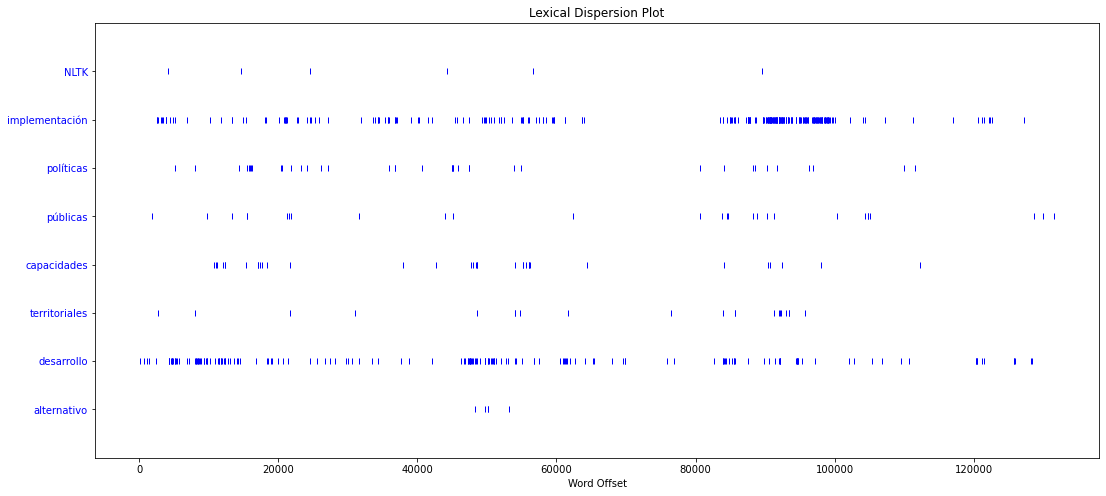

In [19]:
acuerdo_nltk.dispersion_plot(["NLTK","implementación","políticas","públicas","capacidades","territoriales","desarrollo","alternativo"])

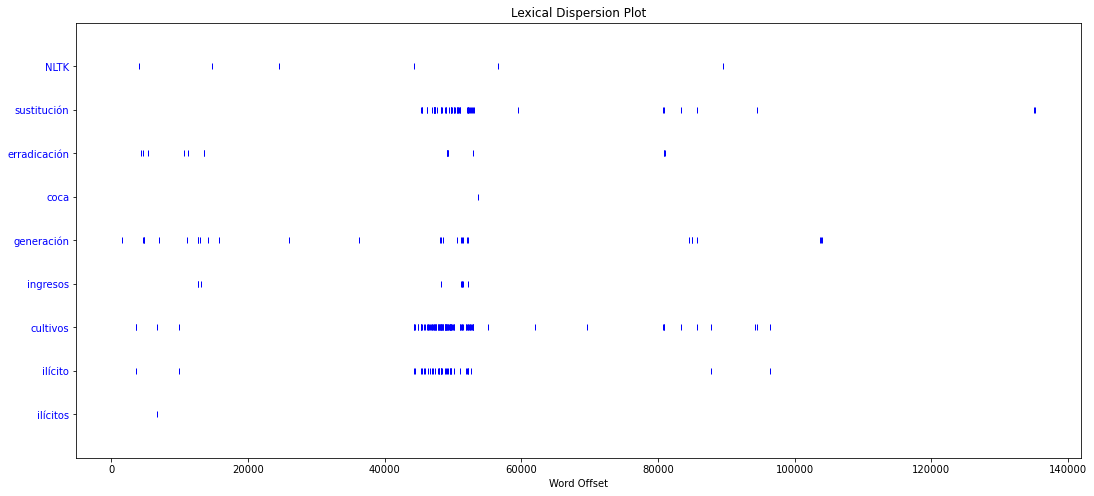

In [152]:
acuerdo_nltk.dispersion_plot(["NLTK","sustitución","erradicación","coca","generación","ingresos","cultivos", "ilícito", "ilícitos"])

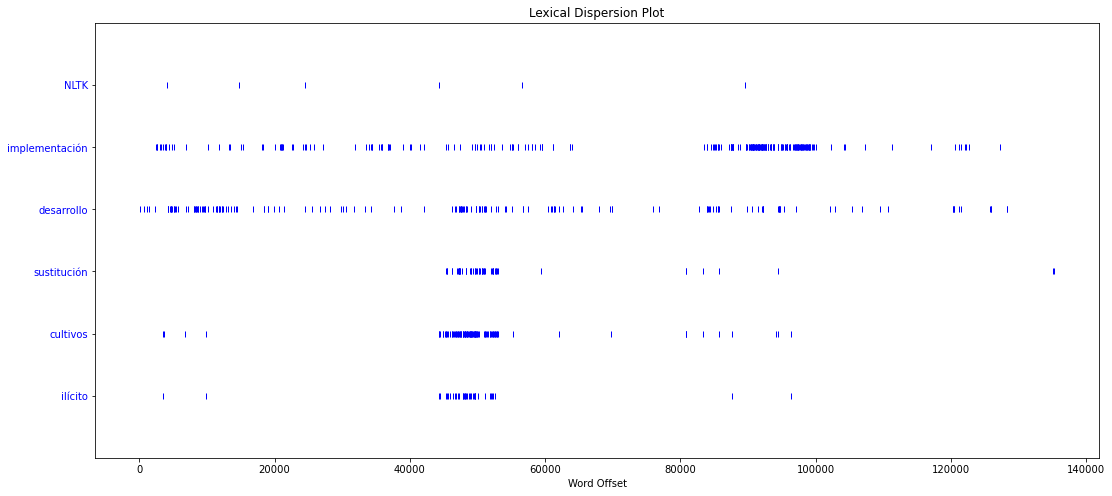

In [154]:
acuerdo_nltk.dispersion_plot(["NLTK","implementación","desarrollo","sustitución","cultivos", "ilícito"])

In [22]:
with open('decreto_pnis.TXT') as t:
    decreto = t.read()

In [23]:
print(decreto)

"Por el cual se crea el Programa Nacional Integral de Sustitución de cultivos de uso ilícito 
-PNIS-" 
EL PRESIDENTE DE LA REPÚBLICA DE COLOMBIA, 
En ejercicio de sus facultades constitucionales y legales, en especial las conferidas por 
el artículo 2 del Acto Legislativo 01 de 2016, y 
CONSIDERANDO: 
1. Consideraciones generales: 
Que con el fin de cumplir el mandato constitucional previsto en el artículo 22 de la 
Constitución Política, el cual señala que la paz es un derecho y un deber de obligatorio 
cumplimiento, el 24 de noviembre de 2016 el Gobierno Nacional suscribió con el grupo 
armado FARC-EP el Acuerdo Final para la Terminación del Conflicto y la Construcción 
de una Paz Estable y Duradera (en adelante el Acuerdo Final). 
Que el Acuerdo Final señala como eje central de la paz impulsar la presencia y la 
acción eficaz del Estado en todo el territorio nacional, en especial en las regiones 
afectadas por la carencia de una función pública eficaz y por los efectos del mismo 
co

In [24]:
type(decreto)

str

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def no_punct1(text):
    '''
    Elimina signos de puntuación y otros caracteres indeseados
    '''
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+', '', text)

In [27]:
not_of_interest1 = ['', 'página',]

In [28]:
all_tokens1 = decreto.split()
all_tokens1

['"Por',
 'el',
 'cual',
 'se',
 'crea',
 'el',
 'Programa',
 'Nacional',
 'Integral',
 'de',
 'Sustitución',
 'de',
 'cultivos',
 'de',
 'uso',
 'ilícito',
 '-PNIS-"',
 'EL',
 'PRESIDENTE',
 'DE',
 'LA',
 'REPÚBLICA',
 'DE',
 'COLOMBIA,',
 'En',
 'ejercicio',
 'de',
 'sus',
 'facultades',
 'constitucionales',
 'y',
 'legales,',
 'en',
 'especial',
 'las',
 'conferidas',
 'por',
 'el',
 'artículo',
 '2',
 'del',
 'Acto',
 'Legislativo',
 '01',
 'de',
 '2016,',
 'y',
 'CONSIDERANDO:',
 '1.',
 'Consideraciones',
 'generales:',
 'Que',
 'con',
 'el',
 'fin',
 'de',
 'cumplir',
 'el',
 'mandato',
 'constitucional',
 'previsto',
 'en',
 'el',
 'artículo',
 '22',
 'de',
 'la',
 'Constitución',
 'Política,',
 'el',
 'cual',
 'señala',
 'que',
 'la',
 'paz',
 'es',
 'un',
 'derecho',
 'y',
 'un',
 'deber',
 'de',
 'obligatorio',
 'cumplimiento,',
 'el',
 '24',
 'de',
 'noviembre',
 'de',
 '2016',
 'el',
 'Gobierno',
 'Nacional',
 'suscribió',
 'con',
 'el',
 'grupo',
 'armado',
 'FARC-EP',
 'e

In [29]:
tokens_no_punc1 = list(map(no_punct1, all_tokens1))
tokens_no_punc1

['Por',
 'el',
 'cual',
 'se',
 'crea',
 'el',
 'Programa',
 'Nacional',
 'Integral',
 'de',
 'Sustitución',
 'de',
 'cultivos',
 'de',
 'uso',
 'ilícito',
 'PNIS',
 'EL',
 'PRESIDENTE',
 'DE',
 'LA',
 'REPÚBLICA',
 'DE',
 'COLOMBIA',
 'En',
 'ejercicio',
 'de',
 'sus',
 'facultades',
 'constitucionales',
 'y',
 'legales',
 'en',
 'especial',
 'las',
 'conferidas',
 'por',
 'el',
 'artículo',
 '2',
 'del',
 'Acto',
 'Legislativo',
 '01',
 'de',
 '2016',
 'y',
 'CONSIDERANDO',
 '1',
 'Consideraciones',
 'generales',
 'Que',
 'con',
 'el',
 'fin',
 'de',
 'cumplir',
 'el',
 'mandato',
 'constitucional',
 'previsto',
 'en',
 'el',
 'artículo',
 '22',
 'de',
 'la',
 'Constitución',
 'Política',
 'el',
 'cual',
 'señala',
 'que',
 'la',
 'paz',
 'es',
 'un',
 'derecho',
 'y',
 'un',
 'deber',
 'de',
 'obligatorio',
 'cumplimiento',
 'el',
 '24',
 'de',
 'noviembre',
 'de',
 '2016',
 'el',
 'Gobierno',
 'Nacional',
 'suscribió',
 'con',
 'el',
 'grupo',
 'armado',
 'FARCEP',
 'el',
 'Acuerdo

In [30]:
lowers = [w.lower () for w in tokens_no_punc1]
lowers

['por',
 'el',
 'cual',
 'se',
 'crea',
 'el',
 'programa',
 'nacional',
 'integral',
 'de',
 'sustitución',
 'de',
 'cultivos',
 'de',
 'uso',
 'ilícito',
 'pnis',
 'el',
 'presidente',
 'de',
 'la',
 'república',
 'de',
 'colombia',
 'en',
 'ejercicio',
 'de',
 'sus',
 'facultades',
 'constitucionales',
 'y',
 'legales',
 'en',
 'especial',
 'las',
 'conferidas',
 'por',
 'el',
 'artículo',
 '2',
 'del',
 'acto',
 'legislativo',
 '01',
 'de',
 '2016',
 'y',
 'considerando',
 '1',
 'consideraciones',
 'generales',
 'que',
 'con',
 'el',
 'fin',
 'de',
 'cumplir',
 'el',
 'mandato',
 'constitucional',
 'previsto',
 'en',
 'el',
 'artículo',
 '22',
 'de',
 'la',
 'constitución',
 'política',
 'el',
 'cual',
 'señala',
 'que',
 'la',
 'paz',
 'es',
 'un',
 'derecho',
 'y',
 'un',
 'deber',
 'de',
 'obligatorio',
 'cumplimiento',
 'el',
 '24',
 'de',
 'noviembre',
 'de',
 '2016',
 'el',
 'gobierno',
 'nacional',
 'suscribió',
 'con',
 'el',
 'grupo',
 'armado',
 'farcep',
 'el',
 'acuerdo

In [31]:
alpha1 = [w for w in lowers if not w.isdigit()]
alpha1

['por',
 'el',
 'cual',
 'se',
 'crea',
 'el',
 'programa',
 'nacional',
 'integral',
 'de',
 'sustitución',
 'de',
 'cultivos',
 'de',
 'uso',
 'ilícito',
 'pnis',
 'el',
 'presidente',
 'de',
 'la',
 'república',
 'de',
 'colombia',
 'en',
 'ejercicio',
 'de',
 'sus',
 'facultades',
 'constitucionales',
 'y',
 'legales',
 'en',
 'especial',
 'las',
 'conferidas',
 'por',
 'el',
 'artículo',
 'del',
 'acto',
 'legislativo',
 'de',
 'y',
 'considerando',
 'consideraciones',
 'generales',
 'que',
 'con',
 'el',
 'fin',
 'de',
 'cumplir',
 'el',
 'mandato',
 'constitucional',
 'previsto',
 'en',
 'el',
 'artículo',
 'de',
 'la',
 'constitución',
 'política',
 'el',
 'cual',
 'señala',
 'que',
 'la',
 'paz',
 'es',
 'un',
 'derecho',
 'y',
 'un',
 'deber',
 'de',
 'obligatorio',
 'cumplimiento',
 'el',
 'de',
 'noviembre',
 'de',
 'el',
 'gobierno',
 'nacional',
 'suscribió',
 'con',
 'el',
 'grupo',
 'armado',
 'farcep',
 'el',
 'acuerdo',
 'final',
 'para',
 'la',
 'terminación',
 'del'

In [32]:
freqdist1 = nltk.FreqDist(alpha1)
freqdist1

FreqDist({'de': 595, 'la': 242, 'y': 228, 'el': 216, 'del': 181, 'los': 164, 'en': 137, 'que': 133, 'las': 123, 'cultivos': 84, ...})

In [33]:
stopwords_esp1 = stopwords.words('spanish')
stopwords_esp1

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [34]:
tokens_no_stop1 = [w for w in alpha1 if w not in stopwords_esp1]
tokens_no_stop1

['crea',
 'programa',
 'nacional',
 'integral',
 'sustitución',
 'cultivos',
 'uso',
 'ilícito',
 'pnis',
 'presidente',
 'república',
 'colombia',
 'ejercicio',
 'facultades',
 'constitucionales',
 'legales',
 'especial',
 'conferidas',
 'artículo',
 'acto',
 'legislativo',
 'considerando',
 'consideraciones',
 'generales',
 'fin',
 'cumplir',
 'mandato',
 'constitucional',
 'previsto',
 'artículo',
 'constitución',
 'política',
 'señala',
 'paz',
 'derecho',
 'deber',
 'obligatorio',
 'cumplimiento',
 'noviembre',
 'gobierno',
 'nacional',
 'suscribió',
 'grupo',
 'armado',
 'farcep',
 'acuerdo',
 'final',
 'terminación',
 'conflicto',
 'construcción',
 'paz',
 'estable',
 'duradera',
 'adelante',
 'acuerdo',
 'final',
 'acuerdo',
 'final',
 'señala',
 'eje',
 'central',
 'paz',
 'impulsar',
 'presencia',
 'acción',
 'eficaz',
 'territorio',
 'nacional',
 'especial',
 'regiones',
 'afectadas',
 'carencia',
 'función',
 'pública',
 'eficaz',
 'efectos',
 'mismo',
 'conflicto',
 'armad

In [35]:
freqdist1 = nltk.FreqDist(tokens_no_stop1)
freqdist1.most_common()

[('cultivos', 84),
 ('uso', 77),
 ('sustitución', 75),
 ('ilícito', 75),
 ('pnis', 65),
 ('acuerdo', 61),
 ('nacional', 58),
 ('programa', 56),
 ('integral', 49),
 ('final', 45),
 ('comunidades', 45),
 ('', 42),
 ('decreto', 41),
 ('desarrollo', 37),
 ('punto', 33),
 ('implementación', 28),
 ('planes', 27),
 ('artículo', 26),
 ('territorios', 23),
 ('gobierno', 22),
 ('integrales', 16),
 ('crea', 15),
 ('presente', 15),
 ('condiciones', 15),
 ('municipales', 15),
 ('alternativo', 14),
 ('acuerdos', 14),
 ('conflicto', 13),
 ('construcción', 13),
 ('continuación', 13),
 ('siguientes', 13),
 ('participativa', 13),
 ('mediante', 12),
 ('numero', 12),
 ('hoja', 12),
 ('compromiso', 12),
 ('marcha', 12),
 ('dirección', 12),
 ('república', 11),
 ('ley', 11),
 ('ejecución', 11),
 ('comunitarios', 11),
 ('proceso', 10),
 ('objeto', 10),
 ('solución', 10),
 ('problema', 10),
 ('pobreza', 10),
 ('voluntaria', 10),
 ('pisda', 10),
 ('legislativo', 9),
 ('territorio', 9),
 ('rural', 9),
 ('drogas'

In [36]:
tokens_of_interest1 = [w for w in alpha1 if w not in not_of_interest1]
tokens_of_interest1

['por',
 'el',
 'cual',
 'se',
 'crea',
 'el',
 'programa',
 'nacional',
 'integral',
 'de',
 'sustitución',
 'de',
 'cultivos',
 'de',
 'uso',
 'ilícito',
 'pnis',
 'el',
 'presidente',
 'de',
 'la',
 'república',
 'de',
 'colombia',
 'en',
 'ejercicio',
 'de',
 'sus',
 'facultades',
 'constitucionales',
 'y',
 'legales',
 'en',
 'especial',
 'las',
 'conferidas',
 'por',
 'el',
 'artículo',
 'del',
 'acto',
 'legislativo',
 'de',
 'y',
 'considerando',
 'consideraciones',
 'generales',
 'que',
 'con',
 'el',
 'fin',
 'de',
 'cumplir',
 'el',
 'mandato',
 'constitucional',
 'previsto',
 'en',
 'el',
 'artículo',
 'de',
 'la',
 'constitución',
 'política',
 'el',
 'cual',
 'señala',
 'que',
 'la',
 'paz',
 'es',
 'un',
 'derecho',
 'y',
 'un',
 'deber',
 'de',
 'obligatorio',
 'cumplimiento',
 'el',
 'de',
 'noviembre',
 'de',
 'el',
 'gobierno',
 'nacional',
 'suscribió',
 'con',
 'el',
 'grupo',
 'armado',
 'farcep',
 'el',
 'acuerdo',
 'final',
 'para',
 'la',
 'terminación',
 'del'

In [37]:
tokens_nltk1 = nltk.Text(tokens_of_interest1)
tokens_nltk1

<Text: por el cual se crea el programa nacional...>

In [38]:
type(tokens_nltk1)

nltk.text.Text

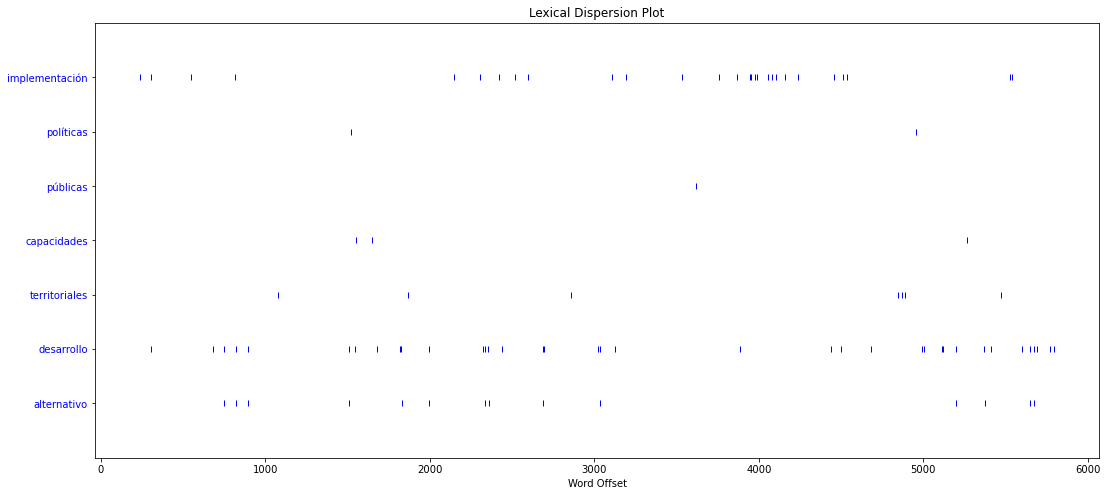

In [39]:
tokens_nltk1.dispersion_plot(["implementación","políticas","públicas","capacidades","territoriales","desarrollo","alternativo"])

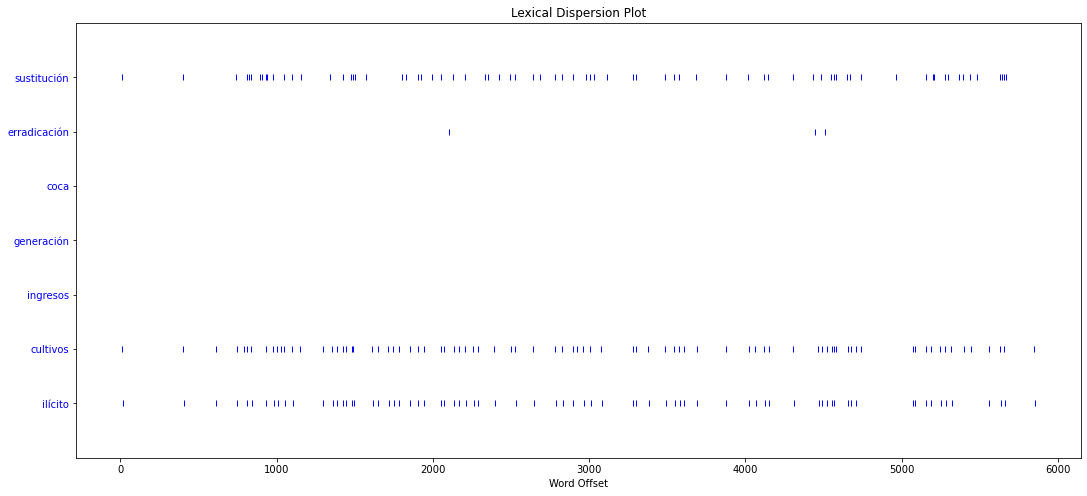

In [40]:
tokens_nltk1.dispersion_plot(["sustitución","erradicación","coca","generación","ingresos","cultivos", "ilícito"])

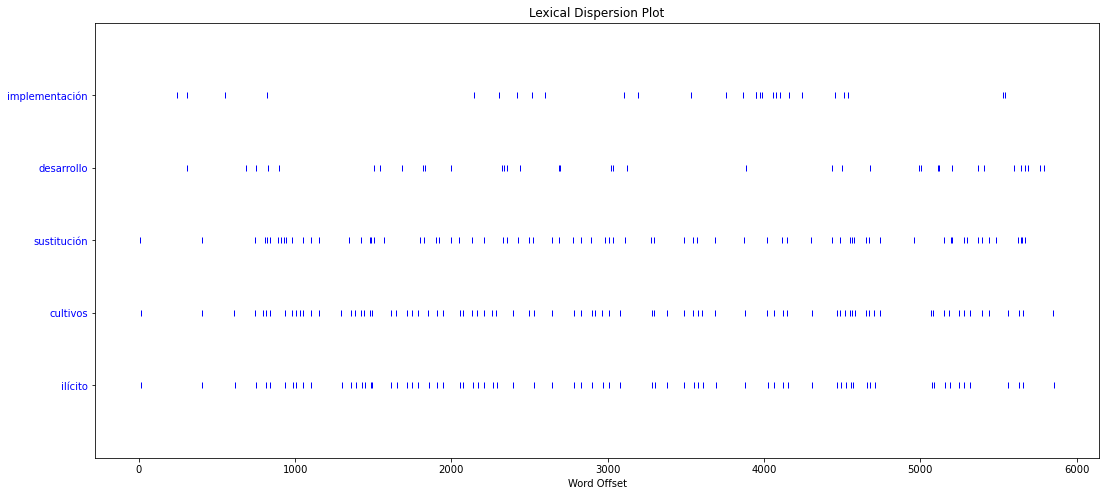

In [41]:
tokens_nltk1.dispersion_plot(["implementación","desarrollo","sustitución","cultivos", "ilícito"])

In [42]:
with open('plan_desarrollo_2020.TXT') as t:
    plan2020 = t.read()

In [43]:
print(plan2020)




PLAN DE DESARROLLO
“Enamórate de Tumaco 2.020 – 2.023” Alcaldesa María Emilsen Angulo Guevara.
 


ALCALDÍA DISTRITAL DE TUMACO

MARÍA EMILSEN ANGULO GUEVARA
Alcaldesa Distrital.

KEILA ROCIO MEDOZA	ANA MIREYA QUIÑONES
Secretaria de Educación	Secretaria de Salud

TANIA MARÍA SANZ  ROSERO	EDWARD ALFONSO VELEZ  PRECIADO
Secretaria de Planeación y Desarrollo Urbano	Secretario de Agricultura, Desarrollo y Pesca

EVELÍN CECILIA BENAVIDES GIRÓN.	CINDY PAOLA CUERO
Secretaria de Hacienda	Secretaria General

PAOLA ANDREA GOMEZ MERO	GISELL ESCRUCERÍA ANDRADE
Secretaria de Gobierno	Oficina de Turismo

JAMES ALONSO GARCÍA SAENZ	ROSA AANGÉLICA TENORIO
Unidad de Tránsito	Oficina de Cultura

NIBYS SAYA	HEYRA PATRICIA CASTRO
Ofcina de Deportes	Aguas de Tumaco E.S.P.

CAROLINA FARINANGO
C. H. Divino Niño E.SE.
 


Asesores y colaboradores

ANDRES FELIPE JIMÉNEZ LONDOÑO.
Coordinador PDM.


DIEGO ESCRUCERIA CALONGE	JIMMY A. CORREA	ROCIO SEVILLANO
Asesor .	Asesor.	Asesora



MARTHA LUCÍA SALAZAR KALIL.

In [44]:
type(plan2020)

str

In [45]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def no_punct2(text):
    '''
    Elimina signos de puntuación y otros caracteres indeseados
    '''
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+', '', text)

In [47]:
not_of_interest2 = ['', 'página',]

In [48]:
all_tokens2 = plan2020.split()
all_tokens2

['PLAN',
 'DE',
 'DESARROLLO',
 '“Enamórate',
 'de',
 'Tumaco',
 '2.020',
 '–',
 '2.023”',
 'Alcaldesa',
 'María',
 'Emilsen',
 'Angulo',
 'Guevara.',
 'ALCALDÍA',
 'DISTRITAL',
 'DE',
 'TUMACO',
 'MARÍA',
 'EMILSEN',
 'ANGULO',
 'GUEVARA',
 'Alcaldesa',
 'Distrital.',
 'KEILA',
 'ROCIO',
 'MEDOZA',
 'ANA',
 'MIREYA',
 'QUIÑONES',
 'Secretaria',
 'de',
 'Educación',
 'Secretaria',
 'de',
 'Salud',
 'TANIA',
 'MARÍA',
 'SANZ',
 'ROSERO',
 'EDWARD',
 'ALFONSO',
 'VELEZ',
 'PRECIADO',
 'Secretaria',
 'de',
 'Planeación',
 'y',
 'Desarrollo',
 'Urbano',
 'Secretario',
 'de',
 'Agricultura,',
 'Desarrollo',
 'y',
 'Pesca',
 'EVELÍN',
 'CECILIA',
 'BENAVIDES',
 'GIRÓN.',
 'CINDY',
 'PAOLA',
 'CUERO',
 'Secretaria',
 'de',
 'Hacienda',
 'Secretaria',
 'General',
 'PAOLA',
 'ANDREA',
 'GOMEZ',
 'MERO',
 'GISELL',
 'ESCRUCERÍA',
 'ANDRADE',
 'Secretaria',
 'de',
 'Gobierno',
 'Oficina',
 'de',
 'Turismo',
 'JAMES',
 'ALONSO',
 'GARCÍA',
 'SAENZ',
 'ROSA',
 'AANGÉLICA',
 'TENORIO',
 'Unidad',
 '

In [49]:
tokens_no_punc2 = list(map(no_punct2, all_tokens2))
tokens_no_punc2

['PLAN',
 'DE',
 'DESARROLLO',
 '“Enamórate',
 'de',
 'Tumaco',
 '2020',
 '–',
 '2023”',
 'Alcaldesa',
 'María',
 'Emilsen',
 'Angulo',
 'Guevara',
 'ALCALDÍA',
 'DISTRITAL',
 'DE',
 'TUMACO',
 'MARÍA',
 'EMILSEN',
 'ANGULO',
 'GUEVARA',
 'Alcaldesa',
 'Distrital',
 'KEILA',
 'ROCIO',
 'MEDOZA',
 'ANA',
 'MIREYA',
 'QUIÑONES',
 'Secretaria',
 'de',
 'Educación',
 'Secretaria',
 'de',
 'Salud',
 'TANIA',
 'MARÍA',
 'SANZ',
 'ROSERO',
 'EDWARD',
 'ALFONSO',
 'VELEZ',
 'PRECIADO',
 'Secretaria',
 'de',
 'Planeación',
 'y',
 'Desarrollo',
 'Urbano',
 'Secretario',
 'de',
 'Agricultura',
 'Desarrollo',
 'y',
 'Pesca',
 'EVELÍN',
 'CECILIA',
 'BENAVIDES',
 'GIRÓN',
 'CINDY',
 'PAOLA',
 'CUERO',
 'Secretaria',
 'de',
 'Hacienda',
 'Secretaria',
 'General',
 'PAOLA',
 'ANDREA',
 'GOMEZ',
 'MERO',
 'GISELL',
 'ESCRUCERÍA',
 'ANDRADE',
 'Secretaria',
 'de',
 'Gobierno',
 'Oficina',
 'de',
 'Turismo',
 'JAMES',
 'ALONSO',
 'GARCÍA',
 'SAENZ',
 'ROSA',
 'AANGÉLICA',
 'TENORIO',
 'Unidad',
 'de',
 

In [50]:
lowers1 = [w.lower () for w in tokens_no_punc2]
lowers1

['plan',
 'de',
 'desarrollo',
 '“enamórate',
 'de',
 'tumaco',
 '2020',
 '–',
 '2023”',
 'alcaldesa',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldía',
 'distrital',
 'de',
 'tumaco',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldesa',
 'distrital',
 'keila',
 'rocio',
 'medoza',
 'ana',
 'mireya',
 'quiñones',
 'secretaria',
 'de',
 'educación',
 'secretaria',
 'de',
 'salud',
 'tania',
 'maría',
 'sanz',
 'rosero',
 'edward',
 'alfonso',
 'velez',
 'preciado',
 'secretaria',
 'de',
 'planeación',
 'y',
 'desarrollo',
 'urbano',
 'secretario',
 'de',
 'agricultura',
 'desarrollo',
 'y',
 'pesca',
 'evelín',
 'cecilia',
 'benavides',
 'girón',
 'cindy',
 'paola',
 'cuero',
 'secretaria',
 'de',
 'hacienda',
 'secretaria',
 'general',
 'paola',
 'andrea',
 'gomez',
 'mero',
 'gisell',
 'escrucería',
 'andrade',
 'secretaria',
 'de',
 'gobierno',
 'oficina',
 'de',
 'turismo',
 'james',
 'alonso',
 'garcía',
 'saenz',
 'rosa',
 'aangélica',
 'tenorio',
 'unidad',
 'de',
 

In [51]:
alpha2 = [w for w in lowers1 if not w.isdigit()]
alpha2

['plan',
 'de',
 'desarrollo',
 '“enamórate',
 'de',
 'tumaco',
 '–',
 '2023”',
 'alcaldesa',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldía',
 'distrital',
 'de',
 'tumaco',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldesa',
 'distrital',
 'keila',
 'rocio',
 'medoza',
 'ana',
 'mireya',
 'quiñones',
 'secretaria',
 'de',
 'educación',
 'secretaria',
 'de',
 'salud',
 'tania',
 'maría',
 'sanz',
 'rosero',
 'edward',
 'alfonso',
 'velez',
 'preciado',
 'secretaria',
 'de',
 'planeación',
 'y',
 'desarrollo',
 'urbano',
 'secretario',
 'de',
 'agricultura',
 'desarrollo',
 'y',
 'pesca',
 'evelín',
 'cecilia',
 'benavides',
 'girón',
 'cindy',
 'paola',
 'cuero',
 'secretaria',
 'de',
 'hacienda',
 'secretaria',
 'general',
 'paola',
 'andrea',
 'gomez',
 'mero',
 'gisell',
 'escrucería',
 'andrade',
 'secretaria',
 'de',
 'gobierno',
 'oficina',
 'de',
 'turismo',
 'james',
 'alonso',
 'garcía',
 'saenz',
 'rosa',
 'aangélica',
 'tenorio',
 'unidad',
 'de',
 'tránsito

In [52]:
freqdist2 = nltk.FreqDist(alpha2)
freqdist2

FreqDist({'de': 7278, 'y': 3116, 'la': 3027, 'en': 1894, 'el': 1833, 'a': 1370, '': 1207, 'del': 1172, 'los': 993, 'para': 969, ...})

In [53]:
stopwords_esp2 = stopwords.words('spanish')
stopwords_esp2

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [54]:
tokens_no_stop2 = [w for w in alpha2 if w not in stopwords_esp2]
tokens_no_stop2

['plan',
 'desarrollo',
 '“enamórate',
 'tumaco',
 '–',
 '2023”',
 'alcaldesa',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldía',
 'distrital',
 'tumaco',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldesa',
 'distrital',
 'keila',
 'rocio',
 'medoza',
 'ana',
 'mireya',
 'quiñones',
 'secretaria',
 'educación',
 'secretaria',
 'salud',
 'tania',
 'maría',
 'sanz',
 'rosero',
 'edward',
 'alfonso',
 'velez',
 'preciado',
 'secretaria',
 'planeación',
 'desarrollo',
 'urbano',
 'secretario',
 'agricultura',
 'desarrollo',
 'pesca',
 'evelín',
 'cecilia',
 'benavides',
 'girón',
 'cindy',
 'paola',
 'cuero',
 'secretaria',
 'hacienda',
 'secretaria',
 'general',
 'paola',
 'andrea',
 'gomez',
 'mero',
 'gisell',
 'escrucería',
 'andrade',
 'secretaria',
 'gobierno',
 'oficina',
 'turismo',
 'james',
 'alonso',
 'garcía',
 'saenz',
 'rosa',
 'aangélica',
 'tenorio',
 'unidad',
 'tránsito',
 'oficina',
 'cultura',
 'nibys',
 'saya',
 'heyra',
 'patricia',
 'castro',
 'ofcina'

In [55]:
freqdist2 = nltk.FreqDist(tokens_no_stop2)
freqdist2.most_common()

[('', 1207),
 ('n', 536),
 ('tumaco', 439),
 ('servicio', 365),
 ('gestión', 350),
 ('propia', 348),
 ('aumento', 328),
 ('desarrollo', 307),
 ('municip', 307),
 ('ejecució', 290),
 ('porcentaje', 281),
 ('aument', 268),
 ('ón', 262),
 ('población', 252),
 ('ro', 243),
 ('municipal', 233),
 ('núme', 228),
 ('personas', 226),
 ('educación', 216),
 ('secretarí', 216),
 ('distrito', 215),
 ('–', 212),
 ('d', 200),
 ('urbana', 186),
 ('mira', 183),
 ('salud', 182),
 ('territorio', 170),
 ('social', 170),
 ('oficina', 162),
 ('fuente', 161),
 ('san', 160),
 ('bajo', 157),
 ('zona', 154),
 ('númer', 154),
 ('rural', 152),
 ('s', 144),
 ('expansión', 141),
 ('chilvi', 137),
 ('secretaría', 137),
 ('alto', 136),
 ('servicios', 135),
 ('carretera', 133),
 ('número', 133),
 ('bucheli', 130),
 ('robles', 129),
 ('infraestructura', 128),
 ('atención', 127),
 ('plan', 125),
 ('media', 122),
 ('acceso', 118),
 ('información', 113),
 ('costa', 112),
 ('seguridad', 112),
 ('años', 112),
 ('agua', 112)

In [56]:
tokens_of_interest2 = [w for w in alpha2 if w not in not_of_interest2]
tokens_of_interest2

['plan',
 'de',
 'desarrollo',
 '“enamórate',
 'de',
 'tumaco',
 '–',
 '2023”',
 'alcaldesa',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldía',
 'distrital',
 'de',
 'tumaco',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldesa',
 'distrital',
 'keila',
 'rocio',
 'medoza',
 'ana',
 'mireya',
 'quiñones',
 'secretaria',
 'de',
 'educación',
 'secretaria',
 'de',
 'salud',
 'tania',
 'maría',
 'sanz',
 'rosero',
 'edward',
 'alfonso',
 'velez',
 'preciado',
 'secretaria',
 'de',
 'planeación',
 'y',
 'desarrollo',
 'urbano',
 'secretario',
 'de',
 'agricultura',
 'desarrollo',
 'y',
 'pesca',
 'evelín',
 'cecilia',
 'benavides',
 'girón',
 'cindy',
 'paola',
 'cuero',
 'secretaria',
 'de',
 'hacienda',
 'secretaria',
 'general',
 'paola',
 'andrea',
 'gomez',
 'mero',
 'gisell',
 'escrucería',
 'andrade',
 'secretaria',
 'de',
 'gobierno',
 'oficina',
 'de',
 'turismo',
 'james',
 'alonso',
 'garcía',
 'saenz',
 'rosa',
 'aangélica',
 'tenorio',
 'unidad',
 'de',
 'tránsito

In [57]:
tokens_nltk2 = nltk.Text(tokens_of_interest2)
tokens_nltk2

<Text: plan de desarrollo “enamórate de tumaco – 2023”...>

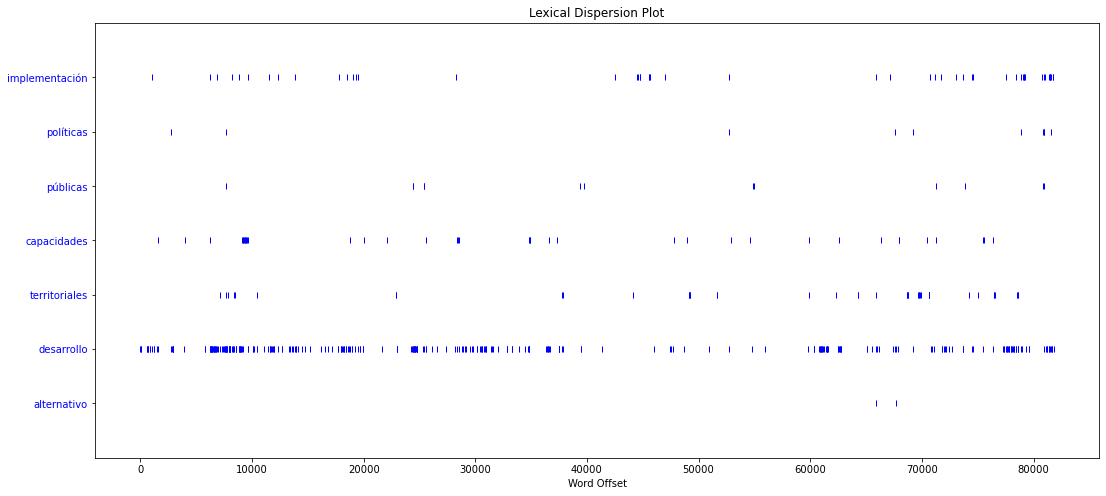

In [58]:
tokens_nltk2.dispersion_plot(["implementación","políticas","públicas","capacidades","territoriales","desarrollo","alternativo"])

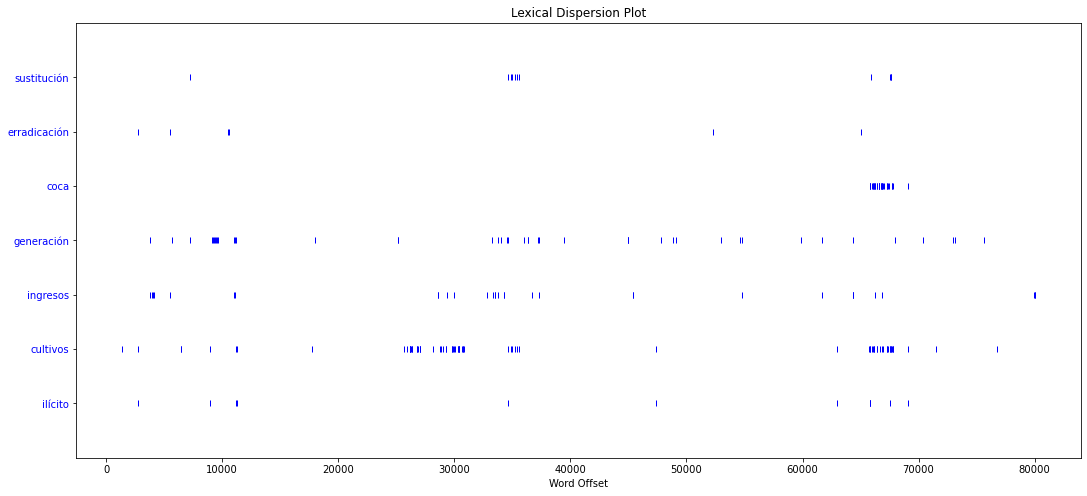

In [59]:
tokens_nltk2.dispersion_plot(["sustitución","erradicación","coca","generación","ingresos","cultivos", "ilícito"])

In [60]:
with open('plan_desarrollo_2016.TXT') as t:
    plan2016 = t.read()

In [61]:
print(plan2016)



REPÚBLICA DE COLOMBIA


ALCALDÍA MUNICIPAL DE TUMACO



PLAN DE DESARROLLO MUNICIPAL 2.016 – 2.019


“TUMACO nuestra PAZión”

San Andrés de Tumaco






MARÍA EMILSEN ANGULO GUEVARA
Alcaldesa Municipal de Tumaco
En Memoria de MARIO BLANCO ESTEBAN, gran político y líder municipal. (Q.E.P.D. 25/03/2.016)
 



SECRETARIAS DE LA ALCALDÍA MUNICIPAL DE TUMACO.


 
Arq. Jimmy Correa Orobio.
Secretario de Planeación y Desarrollo Urbano.


Dr. Iván Quiñones Zambrano. Secretario de Educación.

Dr. Edwin Palma Bernal. Secretario de Gobierno.

Dra. Francy Medina Ponte.
Secretaria de Salud.
 
Dra. Evelin Cecilia Benavides.
Secretaria de Hacienda.


Ing. Edward Vélez Preciado.
Secretario de Agricultura, Pesca, Desarrollo Económico y Turismo.


Dra. Heyra Patricia Castro Quiñones.
Secretaria General.


Dr. Mauricio Ocampo.
Jefe Jurídico.


Dr. Jacob Armero Dájome.
Asesor de Despacho.
 






EQUIPO FORMULADOR DEL PLAN DE DESARROLLO MUNICIPAL.




 
Jimmy Alfredo Correa Orobio.
Secretario de Planeac

In [62]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
def no_punct3(text):
    '''
    Elimina signos de puntuación y otros caracteres indeseados
    '''
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+', '', text)

In [64]:
not_of_interest3 = ['', 'página',]

In [65]:
all_tokens3 = plan2016.split()
all_tokens3

['REPÚBLICA',
 'DE',
 'COLOMBIA',
 'ALCALDÍA',
 'MUNICIPAL',
 'DE',
 'TUMACO',
 'PLAN',
 'DE',
 'DESARROLLO',
 'MUNICIPAL',
 '2.016',
 '–',
 '2.019',
 '“TUMACO',
 'nuestra',
 'PAZión”',
 'San',
 'Andrés',
 'de',
 'Tumaco',
 'MARÍA',
 'EMILSEN',
 'ANGULO',
 'GUEVARA',
 'Alcaldesa',
 'Municipal',
 'de',
 'Tumaco',
 'En',
 'Memoria',
 'de',
 'MARIO',
 'BLANCO',
 'ESTEBAN,',
 'gran',
 'político',
 'y',
 'líder',
 'municipal.',
 '(Q.E.P.D.',
 '25/03/2.016)',
 'SECRETARIAS',
 'DE',
 'LA',
 'ALCALDÍA',
 'MUNICIPAL',
 'DE',
 'TUMACO.',
 'Arq.',
 'Jimmy',
 'Correa',
 'Orobio.',
 'Secretario',
 'de',
 'Planeación',
 'y',
 'Desarrollo',
 'Urbano.',
 'Dr.',
 'Iván',
 'Quiñones',
 'Zambrano.',
 'Secretario',
 'de',
 'Educación.',
 'Dr.',
 'Edwin',
 'Palma',
 'Bernal.',
 'Secretario',
 'de',
 'Gobierno.',
 'Dra.',
 'Francy',
 'Medina',
 'Ponte.',
 'Secretaria',
 'de',
 'Salud.',
 'Dra.',
 'Evelin',
 'Cecilia',
 'Benavides.',
 'Secretaria',
 'de',
 'Hacienda.',
 'Ing.',
 'Edward',
 'Vélez',
 'Preciad

In [66]:
tokens_no_punc3 = list(map(no_punct3, all_tokens3))
tokens_no_punc3

['REPÚBLICA',
 'DE',
 'COLOMBIA',
 'ALCALDÍA',
 'MUNICIPAL',
 'DE',
 'TUMACO',
 'PLAN',
 'DE',
 'DESARROLLO',
 'MUNICIPAL',
 '2016',
 '–',
 '2019',
 '“TUMACO',
 'nuestra',
 'PAZión”',
 'San',
 'Andrés',
 'de',
 'Tumaco',
 'MARÍA',
 'EMILSEN',
 'ANGULO',
 'GUEVARA',
 'Alcaldesa',
 'Municipal',
 'de',
 'Tumaco',
 'En',
 'Memoria',
 'de',
 'MARIO',
 'BLANCO',
 'ESTEBAN',
 'gran',
 'político',
 'y',
 'líder',
 'municipal',
 'QEPD',
 '25032016',
 'SECRETARIAS',
 'DE',
 'LA',
 'ALCALDÍA',
 'MUNICIPAL',
 'DE',
 'TUMACO',
 'Arq',
 'Jimmy',
 'Correa',
 'Orobio',
 'Secretario',
 'de',
 'Planeación',
 'y',
 'Desarrollo',
 'Urbano',
 'Dr',
 'Iván',
 'Quiñones',
 'Zambrano',
 'Secretario',
 'de',
 'Educación',
 'Dr',
 'Edwin',
 'Palma',
 'Bernal',
 'Secretario',
 'de',
 'Gobierno',
 'Dra',
 'Francy',
 'Medina',
 'Ponte',
 'Secretaria',
 'de',
 'Salud',
 'Dra',
 'Evelin',
 'Cecilia',
 'Benavides',
 'Secretaria',
 'de',
 'Hacienda',
 'Ing',
 'Edward',
 'Vélez',
 'Preciado',
 'Secretario',
 'de',
 'Ag

In [67]:
lowers2 = [w.lower () for w in tokens_no_punc3]
lowers2

['república',
 'de',
 'colombia',
 'alcaldía',
 'municipal',
 'de',
 'tumaco',
 'plan',
 'de',
 'desarrollo',
 'municipal',
 '2016',
 '–',
 '2019',
 '“tumaco',
 'nuestra',
 'pazión”',
 'san',
 'andrés',
 'de',
 'tumaco',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldesa',
 'municipal',
 'de',
 'tumaco',
 'en',
 'memoria',
 'de',
 'mario',
 'blanco',
 'esteban',
 'gran',
 'político',
 'y',
 'líder',
 'municipal',
 'qepd',
 '25032016',
 'secretarias',
 'de',
 'la',
 'alcaldía',
 'municipal',
 'de',
 'tumaco',
 'arq',
 'jimmy',
 'correa',
 'orobio',
 'secretario',
 'de',
 'planeación',
 'y',
 'desarrollo',
 'urbano',
 'dr',
 'iván',
 'quiñones',
 'zambrano',
 'secretario',
 'de',
 'educación',
 'dr',
 'edwin',
 'palma',
 'bernal',
 'secretario',
 'de',
 'gobierno',
 'dra',
 'francy',
 'medina',
 'ponte',
 'secretaria',
 'de',
 'salud',
 'dra',
 'evelin',
 'cecilia',
 'benavides',
 'secretaria',
 'de',
 'hacienda',
 'ing',
 'edward',
 'vélez',
 'preciado',
 'secretario',
 'de',
 'ag

In [68]:
alpha3 = [w for w in lowers2 if not w.isdigit()]
alpha3

['república',
 'de',
 'colombia',
 'alcaldía',
 'municipal',
 'de',
 'tumaco',
 'plan',
 'de',
 'desarrollo',
 'municipal',
 '–',
 '“tumaco',
 'nuestra',
 'pazión”',
 'san',
 'andrés',
 'de',
 'tumaco',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldesa',
 'municipal',
 'de',
 'tumaco',
 'en',
 'memoria',
 'de',
 'mario',
 'blanco',
 'esteban',
 'gran',
 'político',
 'y',
 'líder',
 'municipal',
 'qepd',
 'secretarias',
 'de',
 'la',
 'alcaldía',
 'municipal',
 'de',
 'tumaco',
 'arq',
 'jimmy',
 'correa',
 'orobio',
 'secretario',
 'de',
 'planeación',
 'y',
 'desarrollo',
 'urbano',
 'dr',
 'iván',
 'quiñones',
 'zambrano',
 'secretario',
 'de',
 'educación',
 'dr',
 'edwin',
 'palma',
 'bernal',
 'secretario',
 'de',
 'gobierno',
 'dra',
 'francy',
 'medina',
 'ponte',
 'secretaria',
 'de',
 'salud',
 'dra',
 'evelin',
 'cecilia',
 'benavides',
 'secretaria',
 'de',
 'hacienda',
 'ing',
 'edward',
 'vélez',
 'preciado',
 'secretario',
 'de',
 'agricultura',
 'pesca',
 'desarro

In [69]:
freqdist3 = nltk.FreqDist(alpha3)
freqdist3

FreqDist({'de': 6691, 'y': 3155, 'la': 2651, 'en': 1876, 'el': 1777, 'del': 1098, 'para': 992, 'a': 917, 'con': 917, 'los': 876, ...})

In [70]:
stopwords_esp3 = stopwords.words('spanish')
stopwords_esp3

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [71]:
tokens_no_stop3 = [w for w in alpha3 if w not in stopwords_esp3]
tokens_no_stop3

['república',
 'colombia',
 'alcaldía',
 'municipal',
 'tumaco',
 'plan',
 'desarrollo',
 'municipal',
 '–',
 '“tumaco',
 'pazión”',
 'san',
 'andrés',
 'tumaco',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldesa',
 'municipal',
 'tumaco',
 'memoria',
 'mario',
 'blanco',
 'esteban',
 'gran',
 'político',
 'líder',
 'municipal',
 'qepd',
 'secretarias',
 'alcaldía',
 'municipal',
 'tumaco',
 'arq',
 'jimmy',
 'correa',
 'orobio',
 'secretario',
 'planeación',
 'desarrollo',
 'urbano',
 'dr',
 'iván',
 'quiñones',
 'zambrano',
 'secretario',
 'educación',
 'dr',
 'edwin',
 'palma',
 'bernal',
 'secretario',
 'gobierno',
 'dra',
 'francy',
 'medina',
 'ponte',
 'secretaria',
 'salud',
 'dra',
 'evelin',
 'cecilia',
 'benavides',
 'secretaria',
 'hacienda',
 'ing',
 'edward',
 'vélez',
 'preciado',
 'secretario',
 'agricultura',
 'pesca',
 'desarrollo',
 'económico',
 'turismo',
 'dra',
 'heyra',
 'patricia',
 'castro',
 'quiñones',
 'secretaria',
 'general',
 'dr',
 'mauricio',
 '

In [72]:
freqdist3 = nltk.FreqDist(tokens_no_stop3)
freqdist3.most_common()

[('', 555),
 ('nd', 498),
 ('número', 462),
 ('desarrollo', 457),
 ('tumaco', 434),
 ('municipio', 330),
 ('numero', 251),
 ('población', 248),
 ('años', 227),
 ('zona', 208),
 ('plan', 202),
 ('porcentaje', 202),
 ('personas', 169),
 ('niños', 167),
 ('territorial', 159),
 ('niñas', 157),
 ('año', 156),
 ('municipal', 153),
 ('integral', 150),
 ('social', 147),
 ('víctimas', 130),
 ('territorio', 127),
 ('sector', 125),
 ('rural', 121),
 ('adolescentes', 118),
 ('servicios', 117),
 ('educación', 115),
 ('•', 113),
 ('salud', 111),
 ('gestión', 110),
 ('derechos', 107),
 ('atención', 106),
 ('urbana', 105),
 ('zonas', 97),
 ('jóvenes', 95),
 ('vida', 90),
 ('sostenible', 88),
 ('tasa', 88),
 ('producción', 86),
 ('sistema', 84),
 ('–', 83),
 ('paz', 83),
 ('infraestructura', 83),
 ('información', 80),
 ('conflicto', 79),
 ('transporte', 79),
 ('programa', 79),
 ('nacional', 79),
 ('condiciones', 78),
 ('cobertura', 78),
 ('línea', 77),
 ('protección', 77),
 ('urbano', 76),
 ('menores',

In [73]:
tokens_of_interest3 = [w for w in alpha3 if w not in not_of_interest3]
tokens_of_interest3

['república',
 'de',
 'colombia',
 'alcaldía',
 'municipal',
 'de',
 'tumaco',
 'plan',
 'de',
 'desarrollo',
 'municipal',
 '–',
 '“tumaco',
 'nuestra',
 'pazión”',
 'san',
 'andrés',
 'de',
 'tumaco',
 'maría',
 'emilsen',
 'angulo',
 'guevara',
 'alcaldesa',
 'municipal',
 'de',
 'tumaco',
 'en',
 'memoria',
 'de',
 'mario',
 'blanco',
 'esteban',
 'gran',
 'político',
 'y',
 'líder',
 'municipal',
 'qepd',
 'secretarias',
 'de',
 'la',
 'alcaldía',
 'municipal',
 'de',
 'tumaco',
 'arq',
 'jimmy',
 'correa',
 'orobio',
 'secretario',
 'de',
 'planeación',
 'y',
 'desarrollo',
 'urbano',
 'dr',
 'iván',
 'quiñones',
 'zambrano',
 'secretario',
 'de',
 'educación',
 'dr',
 'edwin',
 'palma',
 'bernal',
 'secretario',
 'de',
 'gobierno',
 'dra',
 'francy',
 'medina',
 'ponte',
 'secretaria',
 'de',
 'salud',
 'dra',
 'evelin',
 'cecilia',
 'benavides',
 'secretaria',
 'de',
 'hacienda',
 'ing',
 'edward',
 'vélez',
 'preciado',
 'secretario',
 'de',
 'agricultura',
 'pesca',
 'desarro

In [74]:
tokens_nltk3 = nltk.Text(tokens_of_interest3)
tokens_nltk3

<Text: república de colombia alcaldía municipal de tumaco plan...>

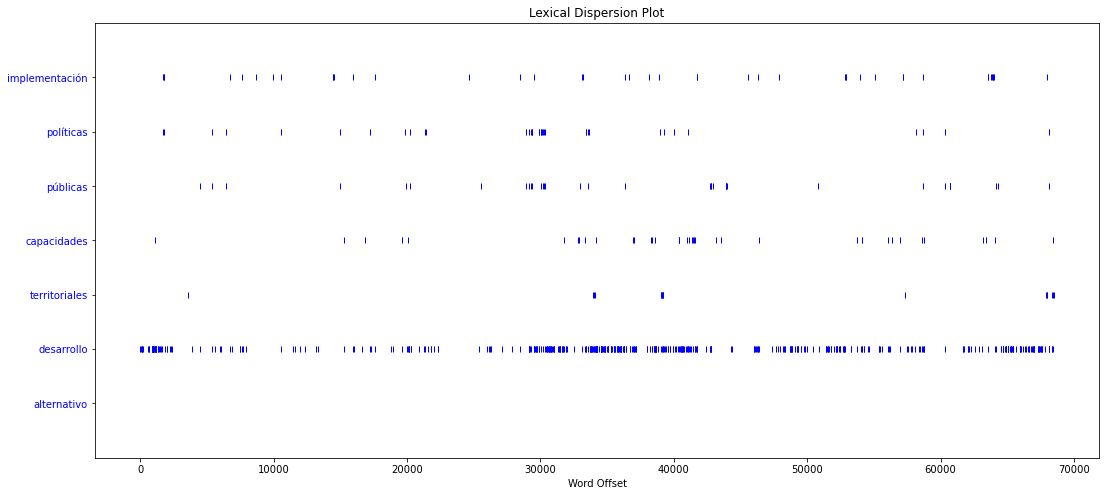

In [75]:
tokens_nltk3.dispersion_plot(["implementación","políticas","públicas","capacidades","territoriales","desarrollo","alternativo"])

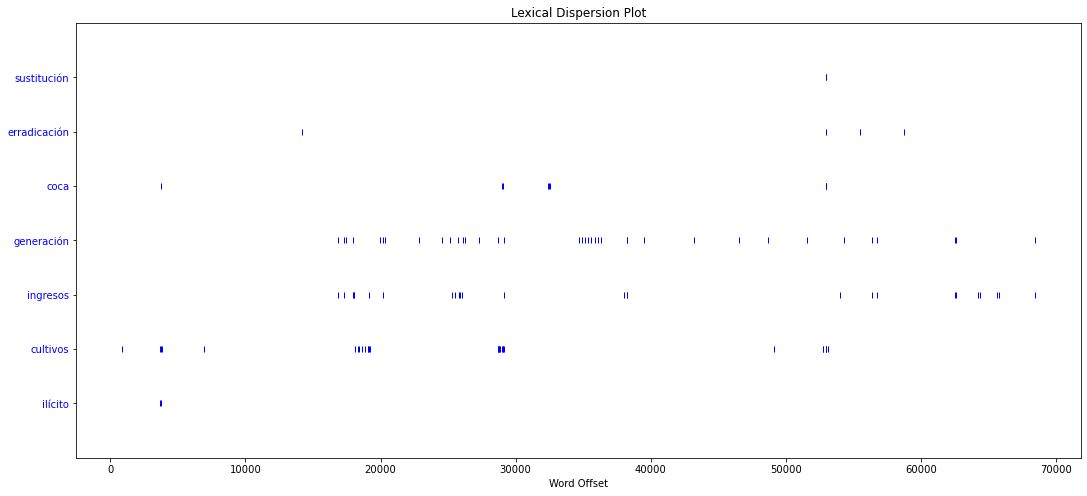

In [76]:
tokens_nltk3.dispersion_plot(["sustitución","erradicación","coca","generación","ingresos","cultivos", "ilícito"])

In [77]:
with open('plan_desarrollo_D_2016-2019.TXT') as t:
    planD2016 = t.read()

In [78]:
print(planD2016)

Plan Participativo de Desarrollo Departamental - Nariño Corazón del Mundo 2016-2016
 
Luis Alfonso Escobar Jaramillo Secretario de Planeación
Mario Alejandro Viteri Palacios Secretario de Gobierno 
Mario Fernando Benavides Jiménez Secretario de Hacienda
Alba Cecilia Chamorro Carvajal Secretaria Equidad de Género e Inclusión Social 
Diego Olegario Arcos Insuasty
Secretario de Infraestructura y Minas 
Doris Mejía Benavides
Secretaria de Educación 
Johanna Mera Botero Secretaria General
Marco Fidel Martínez Gaviria Secretario de Agricultura. 
Ricardo Raúl Muñoz Delgado
Secretario Recreación y Deporte 
Gobernador de Nariño
Carlos Andrés Córdoba Cely Secretario TIC, Innovación y Gobierno Abierto
Martín Efraín Tengana Narváez
Secretario  Ambiente y Desarrollo  
 	Sostenible
Ilich Ruiz Réynel
Asesor de Despacho
Liliana Lucyleth Burbano Benavides Asesora de Despacho 
Angélica María Cruz Dajer Asesora de Despacho
Oscar Antonio Alzate Arbeláez Asesor Gerencia del Pacífico
Paola Lorena Coral Pére

In [79]:
type(planD2016)

str

In [80]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
def no_punct4(text):
    '''
    Elimina signos de puntuación y otros caracteres indeseados
    '''
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+', '', text)

In [82]:
not_of_interest4 = ['', 'página',]

In [83]:
all_tokens4 = planD2016.split()
all_tokens4

['Plan',
 'Participativo',
 'de',
 'Desarrollo',
 'Departamental',
 '-',
 'Nariño',
 'Corazón',
 'del',
 'Mundo',
 '2016-2016',
 'Luis',
 'Alfonso',
 'Escobar',
 'Jaramillo',
 'Secretario',
 'de',
 'Planeación',
 'Mario',
 'Alejandro',
 'Viteri',
 'Palacios',
 'Secretario',
 'de',
 'Gobierno',
 'Mario',
 'Fernando',
 'Benavides',
 'Jiménez',
 'Secretario',
 'de',
 'Hacienda',
 'Alba',
 'Cecilia',
 'Chamorro',
 'Carvajal',
 'Secretaria',
 'Equidad',
 'de',
 'Género',
 'e',
 'Inclusión',
 'Social',
 'Diego',
 'Olegario',
 'Arcos',
 'Insuasty',
 'Secretario',
 'de',
 'Infraestructura',
 'y',
 'Minas',
 'Doris',
 'Mejía',
 'Benavides',
 'Secretaria',
 'de',
 'Educación',
 'Johanna',
 'Mera',
 'Botero',
 'Secretaria',
 'General',
 'Marco',
 'Fidel',
 'Martínez',
 'Gaviria',
 'Secretario',
 'de',
 'Agricultura.',
 'Ricardo',
 'Raúl',
 'Muñoz',
 'Delgado',
 'Secretario',
 'Recreación',
 'y',
 'Deporte',
 'Gobernador',
 'de',
 'Nariño',
 'Carlos',
 'Andrés',
 'Córdoba',
 'Cely',
 'Secretario',

In [84]:
tokens_no_punc4 = list(map(no_punct4, all_tokens4))
tokens_no_punc4

['Plan',
 'Participativo',
 'de',
 'Desarrollo',
 'Departamental',
 '',
 'Nariño',
 'Corazón',
 'del',
 'Mundo',
 '20162016',
 'Luis',
 'Alfonso',
 'Escobar',
 'Jaramillo',
 'Secretario',
 'de',
 'Planeación',
 'Mario',
 'Alejandro',
 'Viteri',
 'Palacios',
 'Secretario',
 'de',
 'Gobierno',
 'Mario',
 'Fernando',
 'Benavides',
 'Jiménez',
 'Secretario',
 'de',
 'Hacienda',
 'Alba',
 'Cecilia',
 'Chamorro',
 'Carvajal',
 'Secretaria',
 'Equidad',
 'de',
 'Género',
 'e',
 'Inclusión',
 'Social',
 'Diego',
 'Olegario',
 'Arcos',
 'Insuasty',
 'Secretario',
 'de',
 'Infraestructura',
 'y',
 'Minas',
 'Doris',
 'Mejía',
 'Benavides',
 'Secretaria',
 'de',
 'Educación',
 'Johanna',
 'Mera',
 'Botero',
 'Secretaria',
 'General',
 'Marco',
 'Fidel',
 'Martínez',
 'Gaviria',
 'Secretario',
 'de',
 'Agricultura',
 'Ricardo',
 'Raúl',
 'Muñoz',
 'Delgado',
 'Secretario',
 'Recreación',
 'y',
 'Deporte',
 'Gobernador',
 'de',
 'Nariño',
 'Carlos',
 'Andrés',
 'Córdoba',
 'Cely',
 'Secretario',
 '

In [85]:
lowers3 = [w.lower () for w in tokens_no_punc4]
lowers3

['plan',
 'participativo',
 'de',
 'desarrollo',
 'departamental',
 '',
 'nariño',
 'corazón',
 'del',
 'mundo',
 '20162016',
 'luis',
 'alfonso',
 'escobar',
 'jaramillo',
 'secretario',
 'de',
 'planeación',
 'mario',
 'alejandro',
 'viteri',
 'palacios',
 'secretario',
 'de',
 'gobierno',
 'mario',
 'fernando',
 'benavides',
 'jiménez',
 'secretario',
 'de',
 'hacienda',
 'alba',
 'cecilia',
 'chamorro',
 'carvajal',
 'secretaria',
 'equidad',
 'de',
 'género',
 'e',
 'inclusión',
 'social',
 'diego',
 'olegario',
 'arcos',
 'insuasty',
 'secretario',
 'de',
 'infraestructura',
 'y',
 'minas',
 'doris',
 'mejía',
 'benavides',
 'secretaria',
 'de',
 'educación',
 'johanna',
 'mera',
 'botero',
 'secretaria',
 'general',
 'marco',
 'fidel',
 'martínez',
 'gaviria',
 'secretario',
 'de',
 'agricultura',
 'ricardo',
 'raúl',
 'muñoz',
 'delgado',
 'secretario',
 'recreación',
 'y',
 'deporte',
 'gobernador',
 'de',
 'nariño',
 'carlos',
 'andrés',
 'córdoba',
 'cely',
 'secretario',
 '

In [86]:
alpha4 = [w for w in lowers3 if not w.isdigit()]
alpha4

['plan',
 'participativo',
 'de',
 'desarrollo',
 'departamental',
 '',
 'nariño',
 'corazón',
 'del',
 'mundo',
 'luis',
 'alfonso',
 'escobar',
 'jaramillo',
 'secretario',
 'de',
 'planeación',
 'mario',
 'alejandro',
 'viteri',
 'palacios',
 'secretario',
 'de',
 'gobierno',
 'mario',
 'fernando',
 'benavides',
 'jiménez',
 'secretario',
 'de',
 'hacienda',
 'alba',
 'cecilia',
 'chamorro',
 'carvajal',
 'secretaria',
 'equidad',
 'de',
 'género',
 'e',
 'inclusión',
 'social',
 'diego',
 'olegario',
 'arcos',
 'insuasty',
 'secretario',
 'de',
 'infraestructura',
 'y',
 'minas',
 'doris',
 'mejía',
 'benavides',
 'secretaria',
 'de',
 'educación',
 'johanna',
 'mera',
 'botero',
 'secretaria',
 'general',
 'marco',
 'fidel',
 'martínez',
 'gaviria',
 'secretario',
 'de',
 'agricultura',
 'ricardo',
 'raúl',
 'muñoz',
 'delgado',
 'secretario',
 'recreación',
 'y',
 'deporte',
 'gobernador',
 'de',
 'nariño',
 'carlos',
 'andrés',
 'córdoba',
 'cely',
 'secretario',
 'tic',
 'innov

In [87]:
freqdist4 = nltk.FreqDist(alpha4)
freqdist4

FreqDist({'de': 9150, 'y': 3626, 'la': 3547, 'en': 2390, 'el': 2167, 'los': 1445, 'del': 1351, 'a': 1137, 'para': 1055, 'las': 971, ...})

In [88]:
stopwords_esp4 = stopwords.words('spanish')
stopwords_esp4

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [89]:
tokens_no_stop4 = [w for w in alpha4 if w not in stopwords_esp4]
tokens_no_stop4

['plan',
 'participativo',
 'desarrollo',
 'departamental',
 '',
 'nariño',
 'corazón',
 'mundo',
 'luis',
 'alfonso',
 'escobar',
 'jaramillo',
 'secretario',
 'planeación',
 'mario',
 'alejandro',
 'viteri',
 'palacios',
 'secretario',
 'gobierno',
 'mario',
 'fernando',
 'benavides',
 'jiménez',
 'secretario',
 'hacienda',
 'alba',
 'cecilia',
 'chamorro',
 'carvajal',
 'secretaria',
 'equidad',
 'género',
 'inclusión',
 'social',
 'diego',
 'olegario',
 'arcos',
 'insuasty',
 'secretario',
 'infraestructura',
 'minas',
 'doris',
 'mejía',
 'benavides',
 'secretaria',
 'educación',
 'johanna',
 'mera',
 'botero',
 'secretaria',
 'general',
 'marco',
 'fidel',
 'martínez',
 'gaviria',
 'secretario',
 'agricultura',
 'ricardo',
 'raúl',
 'muñoz',
 'delgado',
 'secretario',
 'recreación',
 'deporte',
 'gobernador',
 'nariño',
 'carlos',
 'andrés',
 'córdoba',
 'cely',
 'secretario',
 'tic',
 'innovación',
 'gobierno',
 'abierto',
 'martín',
 'efraín',
 'tengana',
 'narváez',
 'secretar

In [90]:
freqdist4 = nltk.FreqDist(tokens_no_stop4)
freqdist4.most_common()

[('departamento', 756),
 ('nariño', 687),
 ('n°', 475),
 ('', 420),
 ('tasa', 417),
 ('desarrollo', 350),
 ('municipios', 340),
 ('social', 338),
 ('proyectos', 307),
 ('total', 298),
 ('cobertura', 297),
 ('subregión', 294),
 ('porcentaje', 262),
 ('plan', 256),
 ('años', 254),
 ('nd', 236),
 ('salud', 221),
 ('implementación', 210),
 ('departamental', 206),
 ('fortalecimiento', 203),
 ('programa', 197),
 ('»', 194),
 ('territorial', 184),
 ('integral', 178),
 ('municipio', 175),
 ('población', 175),
 ('paz', 168),
 ('rural', 167),
 ('sistema', 161),
 ('metas', 159),
 ('educación', 157),
 ('recursos', 156),
 ('gestión', 155),
 ('sector', 153),
 ('riesgo', 152),
 ('nuevos', 151),
 ('mejoramiento', 149),
 ('gobierno', 137),
 ('agua', 137),
 ('pública', 137),
 ('subtotal', 135),
 ('ods', 134),
 ('calidad', 132),
 ('construcción', 127),
 ('alto', 125),
 ('innovación', 123),
 ('política', 123),
 ('infraestructura', 121),
 ('nivel', 118),
 ('atención', 118),
 ('estrategia', 116),
 ('proceso

In [91]:
tokens_of_interest4 = [w for w in alpha4 if w not in not_of_interest4]
tokens_of_interest4

['plan',
 'participativo',
 'de',
 'desarrollo',
 'departamental',
 'nariño',
 'corazón',
 'del',
 'mundo',
 'luis',
 'alfonso',
 'escobar',
 'jaramillo',
 'secretario',
 'de',
 'planeación',
 'mario',
 'alejandro',
 'viteri',
 'palacios',
 'secretario',
 'de',
 'gobierno',
 'mario',
 'fernando',
 'benavides',
 'jiménez',
 'secretario',
 'de',
 'hacienda',
 'alba',
 'cecilia',
 'chamorro',
 'carvajal',
 'secretaria',
 'equidad',
 'de',
 'género',
 'e',
 'inclusión',
 'social',
 'diego',
 'olegario',
 'arcos',
 'insuasty',
 'secretario',
 'de',
 'infraestructura',
 'y',
 'minas',
 'doris',
 'mejía',
 'benavides',
 'secretaria',
 'de',
 'educación',
 'johanna',
 'mera',
 'botero',
 'secretaria',
 'general',
 'marco',
 'fidel',
 'martínez',
 'gaviria',
 'secretario',
 'de',
 'agricultura',
 'ricardo',
 'raúl',
 'muñoz',
 'delgado',
 'secretario',
 'recreación',
 'y',
 'deporte',
 'gobernador',
 'de',
 'nariño',
 'carlos',
 'andrés',
 'córdoba',
 'cely',
 'secretario',
 'tic',
 'innovación

In [92]:
tokens_nltk4 = nltk.Text(tokens_of_interest4)
tokens_nltk4

<Text: plan participativo de desarrollo departamental nariño corazón del...>

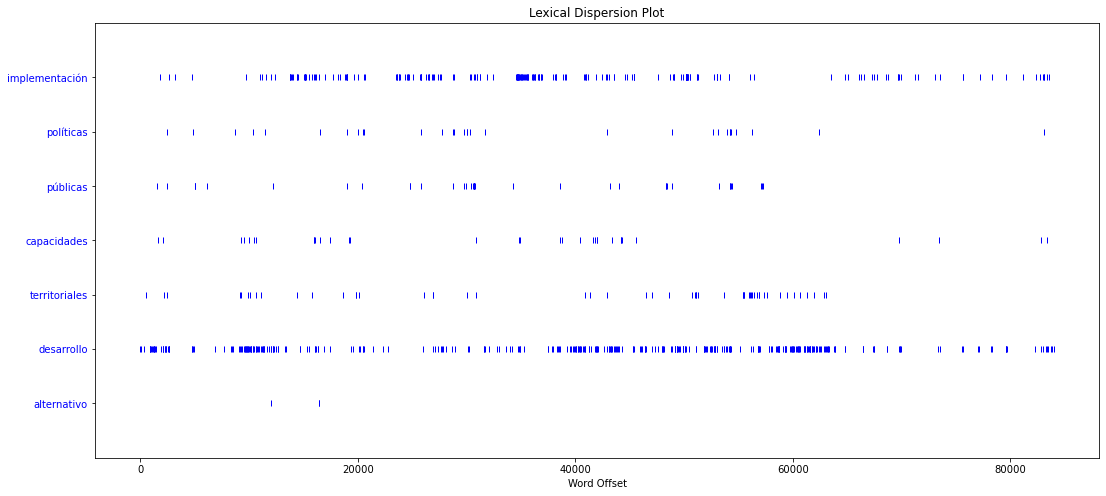

In [93]:
tokens_nltk4.dispersion_plot(["implementación","políticas","públicas","capacidades","territoriales","desarrollo","alternativo"])

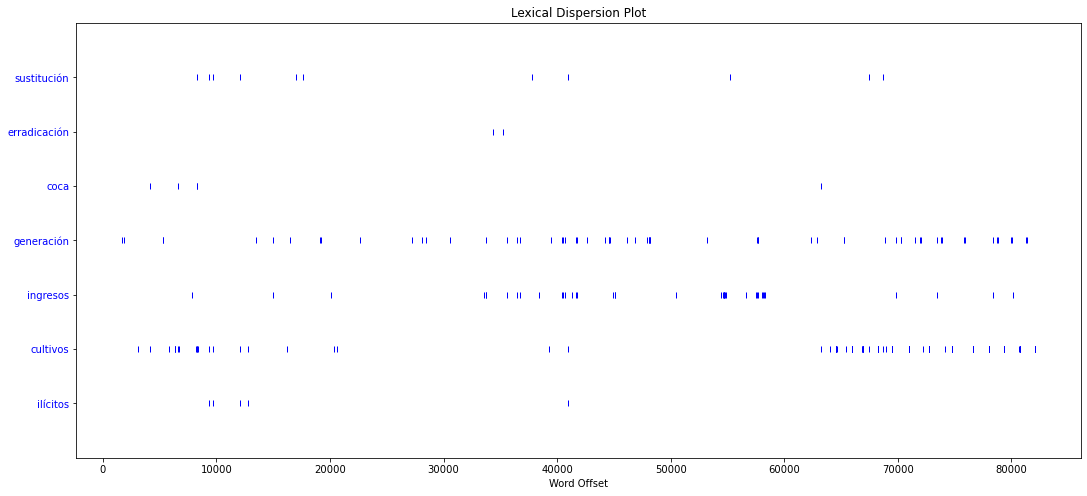

In [151]:
tokens_nltk4.dispersion_plot(["sustitución","erradicación","coca","generación","ingresos","cultivos", "ilícitos"])

In [95]:
with open('plan_desarollo_D2020-2023.TXT') as t:
    planD2020 = t.read()

In [96]:
print(planD2020)


 
ORDENANZA N° 009 DE 2020
(Junio 25)
Por medio de la cual se adopta el Plan de Desarrollo Departamental 
“Mi Nariño, en Defensa de lo Nuestro” para el periodo 2020-2023
LA ASAMBLEA DEPARTAMENTAL DE NARIÑO
En uso de sus atribuciones Constitucionales y Legales, en especial las conferidas por el artículo 300 de la Constitución Política de Colombia, y los artículos 31, 32, 39 y 40 de la Ley 152 de 1994.
ORDENA:
ARTÍCULO PRIMERO: Adoptar el Plan de Desarrollo Departamental “Mi Nariño, en Defensa de lo Nuestro” para el periodo 2020-2023, el cual se describe a continuación.
 

 
Plan de Desarrollo Departamental  Mi Nariño,
en Defensa de lo Nuestro
  2020-2023  
 
Jhon Alexander Rojas Cabrera
 
Gobernador de Nariño
Gabinete Departamental
Euler Aldemar Martínez Rodríguez Secretario de Planeación
Álvaro Francisco Cerón Figueroa Secretario de Gobierno
Viviana Milena Solarte Secretaria de Hacienda
Jairo Arley Chamorro Ger Secretario de Agricultura
Mario Ernesto Enríquez Chenas
Secretario de Infr

In [97]:
type(planD2020)

str

In [98]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [99]:
def no_punct5(text):
    '''
    Elimina signos de puntuación y otros caracteres indeseados
    '''
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+', '', text)

In [100]:
not_of_interest5 = ['', 'página',]

In [101]:
all_tokens5 = planD2020.split()
all_tokens5

['ORDENANZA',
 'N°',
 '009',
 'DE',
 '2020',
 '(Junio',
 '25)',
 'Por',
 'medio',
 'de',
 'la',
 'cual',
 'se',
 'adopta',
 'el',
 'Plan',
 'de',
 'Desarrollo',
 'Departamental',
 '“Mi',
 'Nariño,',
 'en',
 'Defensa',
 'de',
 'lo',
 'Nuestro”',
 'para',
 'el',
 'periodo',
 '2020-2023',
 'LA',
 'ASAMBLEA',
 'DEPARTAMENTAL',
 'DE',
 'NARIÑO',
 'En',
 'uso',
 'de',
 'sus',
 'atribuciones',
 'Constitucionales',
 'y',
 'Legales,',
 'en',
 'especial',
 'las',
 'conferidas',
 'por',
 'el',
 'artículo',
 '300',
 'de',
 'la',
 'Constitución',
 'Política',
 'de',
 'Colombia,',
 'y',
 'los',
 'artículos',
 '31,',
 '32,',
 '39',
 'y',
 '40',
 'de',
 'la',
 'Ley',
 '152',
 'de',
 '1994.',
 'ORDENA:',
 'ARTÍCULO',
 'PRIMERO:',
 'Adoptar',
 'el',
 'Plan',
 'de',
 'Desarrollo',
 'Departamental',
 '“Mi',
 'Nariño,',
 'en',
 'Defensa',
 'de',
 'lo',
 'Nuestro”',
 'para',
 'el',
 'periodo',
 '2020-2023,',
 'el',
 'cual',
 'se',
 'describe',
 'a',
 'continuación.',
 'Plan',
 'de',
 'Desarrollo',
 'Departa

In [102]:
tokens_no_punc5 = list(map(no_punct5, all_tokens5))
tokens_no_punc5

['ORDENANZA',
 'N°',
 '009',
 'DE',
 '2020',
 'Junio',
 '25',
 'Por',
 'medio',
 'de',
 'la',
 'cual',
 'se',
 'adopta',
 'el',
 'Plan',
 'de',
 'Desarrollo',
 'Departamental',
 '“Mi',
 'Nariño',
 'en',
 'Defensa',
 'de',
 'lo',
 'Nuestro”',
 'para',
 'el',
 'periodo',
 '20202023',
 'LA',
 'ASAMBLEA',
 'DEPARTAMENTAL',
 'DE',
 'NARIÑO',
 'En',
 'uso',
 'de',
 'sus',
 'atribuciones',
 'Constitucionales',
 'y',
 'Legales',
 'en',
 'especial',
 'las',
 'conferidas',
 'por',
 'el',
 'artículo',
 '300',
 'de',
 'la',
 'Constitución',
 'Política',
 'de',
 'Colombia',
 'y',
 'los',
 'artículos',
 '31',
 '32',
 '39',
 'y',
 '40',
 'de',
 'la',
 'Ley',
 '152',
 'de',
 '1994',
 'ORDENA',
 'ARTÍCULO',
 'PRIMERO',
 'Adoptar',
 'el',
 'Plan',
 'de',
 'Desarrollo',
 'Departamental',
 '“Mi',
 'Nariño',
 'en',
 'Defensa',
 'de',
 'lo',
 'Nuestro”',
 'para',
 'el',
 'periodo',
 '20202023',
 'el',
 'cual',
 'se',
 'describe',
 'a',
 'continuación',
 'Plan',
 'de',
 'Desarrollo',
 'Departamental',
 'Mi',

In [103]:
lowers4 = [w.lower () for w in tokens_no_punc5]
lowers4

['ordenanza',
 'n°',
 '009',
 'de',
 '2020',
 'junio',
 '25',
 'por',
 'medio',
 'de',
 'la',
 'cual',
 'se',
 'adopta',
 'el',
 'plan',
 'de',
 'desarrollo',
 'departamental',
 '“mi',
 'nariño',
 'en',
 'defensa',
 'de',
 'lo',
 'nuestro”',
 'para',
 'el',
 'periodo',
 '20202023',
 'la',
 'asamblea',
 'departamental',
 'de',
 'nariño',
 'en',
 'uso',
 'de',
 'sus',
 'atribuciones',
 'constitucionales',
 'y',
 'legales',
 'en',
 'especial',
 'las',
 'conferidas',
 'por',
 'el',
 'artículo',
 '300',
 'de',
 'la',
 'constitución',
 'política',
 'de',
 'colombia',
 'y',
 'los',
 'artículos',
 '31',
 '32',
 '39',
 'y',
 '40',
 'de',
 'la',
 'ley',
 '152',
 'de',
 '1994',
 'ordena',
 'artículo',
 'primero',
 'adoptar',
 'el',
 'plan',
 'de',
 'desarrollo',
 'departamental',
 '“mi',
 'nariño',
 'en',
 'defensa',
 'de',
 'lo',
 'nuestro”',
 'para',
 'el',
 'periodo',
 '20202023',
 'el',
 'cual',
 'se',
 'describe',
 'a',
 'continuación',
 'plan',
 'de',
 'desarrollo',
 'departamental',
 'mi',

In [104]:
alpha5 = [w for w in lowers4 if not w.isdigit()]
alpha5

['ordenanza',
 'n°',
 'de',
 'junio',
 'por',
 'medio',
 'de',
 'la',
 'cual',
 'se',
 'adopta',
 'el',
 'plan',
 'de',
 'desarrollo',
 'departamental',
 '“mi',
 'nariño',
 'en',
 'defensa',
 'de',
 'lo',
 'nuestro”',
 'para',
 'el',
 'periodo',
 'la',
 'asamblea',
 'departamental',
 'de',
 'nariño',
 'en',
 'uso',
 'de',
 'sus',
 'atribuciones',
 'constitucionales',
 'y',
 'legales',
 'en',
 'especial',
 'las',
 'conferidas',
 'por',
 'el',
 'artículo',
 'de',
 'la',
 'constitución',
 'política',
 'de',
 'colombia',
 'y',
 'los',
 'artículos',
 'y',
 'de',
 'la',
 'ley',
 'de',
 'ordena',
 'artículo',
 'primero',
 'adoptar',
 'el',
 'plan',
 'de',
 'desarrollo',
 'departamental',
 '“mi',
 'nariño',
 'en',
 'defensa',
 'de',
 'lo',
 'nuestro”',
 'para',
 'el',
 'periodo',
 'el',
 'cual',
 'se',
 'describe',
 'a',
 'continuación',
 'plan',
 'de',
 'desarrollo',
 'departamental',
 'mi',
 'nariño',
 'en',
 'defensa',
 'de',
 'lo',
 'nuestro',
 'jhon',
 'alexander',
 'rojas',
 'cabrera',
 

In [105]:
freqdist5 = nltk.FreqDist(alpha5)
freqdist5

FreqDist({'de': 13670, 'y': 5516, 'la': 5446, 'en': 3528, 'el': 3351, 'del': 2431, 'los': 1943, 'a': 1830, 'para': 1777, 'las': 1495, ...})

In [106]:
stopwords_esp5 = stopwords.words('spanish')
stopwords_esp5

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [107]:
tokens_no_stop5 = [w for w in alpha5 if w not in stopwords_esp5]
tokens_no_stop5

['ordenanza',
 'n°',
 'junio',
 'medio',
 'adopta',
 'plan',
 'desarrollo',
 'departamental',
 '“mi',
 'nariño',
 'defensa',
 'nuestro”',
 'periodo',
 'asamblea',
 'departamental',
 'nariño',
 'uso',
 'atribuciones',
 'constitucionales',
 'legales',
 'especial',
 'conferidas',
 'artículo',
 'constitución',
 'política',
 'colombia',
 'artículos',
 'ley',
 'ordena',
 'artículo',
 'primero',
 'adoptar',
 'plan',
 'desarrollo',
 'departamental',
 '“mi',
 'nariño',
 'defensa',
 'nuestro”',
 'periodo',
 'describe',
 'continuación',
 'plan',
 'desarrollo',
 'departamental',
 'nariño',
 'defensa',
 'jhon',
 'alexander',
 'rojas',
 'cabrera',
 'gobernador',
 'nariño',
 'gabinete',
 'departamental',
 'euler',
 'aldemar',
 'martínez',
 'rodríguez',
 'secretario',
 'planeación',
 'álvaro',
 'francisco',
 'cerón',
 'figueroa',
 'secretario',
 'gobierno',
 'viviana',
 'milena',
 'solarte',
 'secretaria',
 'hacienda',
 'jairo',
 'arley',
 'chamorro',
 'ger',
 'secretario',
 'agricultura',
 'mario',
 

In [108]:
freqdist5 = nltk.FreqDist(tokens_no_stop5)
freqdist5.most_common()

[('nariño', 1036),
 ('departamento', 823),
 ('producto', 615),
 ('meta', 560),
 ('servicio', 550),
 ('desarrollo', 488),
 ('municipios', 484),
 ('salud', 439),
 ('gestión', 431),
 ('número', 418),
 ('social', 407),
 ('proyectos', 400),
 ('indicador', 377),
 ('cuatrienio', 365),
 ('programa', 350),
 ('servicios', 343),
 ('plan', 295),
 ('implementación', 295),
 ('población', 293),
 ('acciones', 273),
 ('seguridad', 271),
 ('sector', 260),
 ('sistema', 256),
 ('fortalecimiento', 244),
 ('recursos', 241),
 ('departamental', 240),
 ('línea', 237),
 ('educación', 222),
 ('base', 221),
 ('bienestar', 215),
 ('atención', 210),
 ('descripción', 209),
 ('través', 206),
 ('estrategia', 203),
 ('asistencia', 202),
 ('riesgo', 201),
 ('técnica', 200),
 ('promoción', 200),
 ('procesos', 198),
 ('objetivo', 198),
 ('calidad', 197),
 ('nacional', 189),
 ('estrategias', 187),
 ('personas', 186),
 ('integral', 183),
 ('agua', 180),
 ('vida', 179),
 ('planes', 177),
 ('acceso', 176),
 ('programas', 174)

In [109]:
tokens_of_interest5 = [w for w in alpha5 if w not in not_of_interest5]
tokens_of_interest5

['ordenanza',
 'n°',
 'de',
 'junio',
 'por',
 'medio',
 'de',
 'la',
 'cual',
 'se',
 'adopta',
 'el',
 'plan',
 'de',
 'desarrollo',
 'departamental',
 '“mi',
 'nariño',
 'en',
 'defensa',
 'de',
 'lo',
 'nuestro”',
 'para',
 'el',
 'periodo',
 'la',
 'asamblea',
 'departamental',
 'de',
 'nariño',
 'en',
 'uso',
 'de',
 'sus',
 'atribuciones',
 'constitucionales',
 'y',
 'legales',
 'en',
 'especial',
 'las',
 'conferidas',
 'por',
 'el',
 'artículo',
 'de',
 'la',
 'constitución',
 'política',
 'de',
 'colombia',
 'y',
 'los',
 'artículos',
 'y',
 'de',
 'la',
 'ley',
 'de',
 'ordena',
 'artículo',
 'primero',
 'adoptar',
 'el',
 'plan',
 'de',
 'desarrollo',
 'departamental',
 '“mi',
 'nariño',
 'en',
 'defensa',
 'de',
 'lo',
 'nuestro”',
 'para',
 'el',
 'periodo',
 'el',
 'cual',
 'se',
 'describe',
 'a',
 'continuación',
 'plan',
 'de',
 'desarrollo',
 'departamental',
 'mi',
 'nariño',
 'en',
 'defensa',
 'de',
 'lo',
 'nuestro',
 'jhon',
 'alexander',
 'rojas',
 'cabrera',
 

In [110]:
tokens_nltk5 = nltk.Text(tokens_of_interest5)
tokens_nltk5

<Text: ordenanza n° de junio por medio de la...>

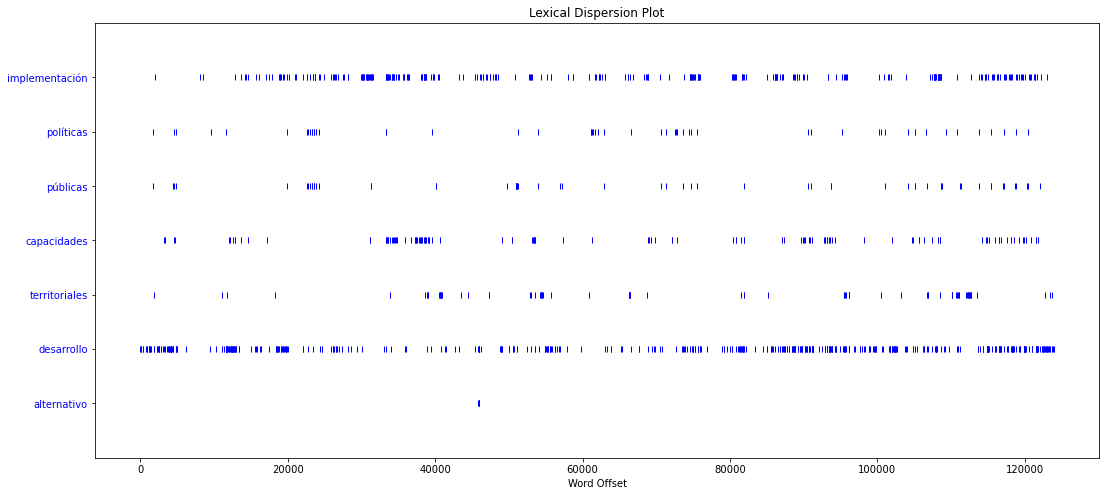

In [111]:
tokens_nltk5.dispersion_plot(["implementación","políticas","públicas","capacidades","territoriales","desarrollo","alternativo"])

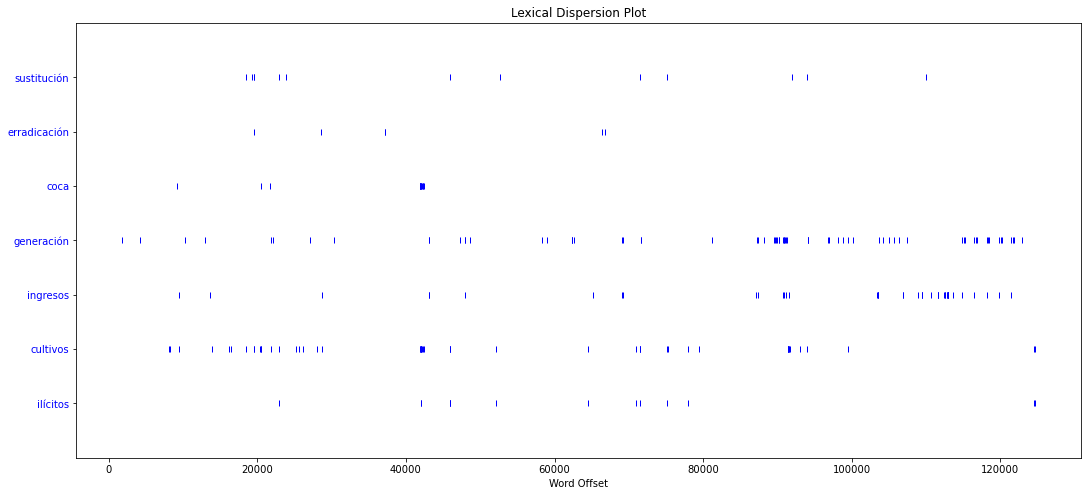

In [155]:
tokens_nltk5.dispersion_plot(["sustitución","erradicación","coca","generación","ingresos","cultivos", "ilícitos"])

**ANALISIS MUNICIPAL**

Se descargan los datos de Medición de Desempeño Municipal MDM -  del Portal Territorial de Colombia https://portalterritorial.dnp.gov.co/AdmInfoTerritorial/MenuInfoTerrEstMDM y https://www.dnp.gov.co/programas/desarrollo-territorial/Estudios-Territoriales/Indicadores-y-Mediciones/Paginas/desempeno-integral.aspx y el Indice de Desempeño Fiscal IDF
https://www.dnp.gov.co/programas/desarrollo-territorial/Estudios-Territoriales/Indicadores-y-Mediciones/Paginas/desempeno-fiscal.aspx con el objetivo de analizar la información de los municipios de Colombia, especialmente nos enfocaremos en Tumaco.

In [113]:
MDM2010=pd.read_excel("ResultadosMDM2010.xlsx")
MDM2011=pd.read_excel("ResultadosMDM2011.xlsx")
MDM2012=pd.read_excel("ResultadosMDM2012.xlsx")
MDM2013=pd.read_excel("ResultadosMDM2013.xlsx")
MDM2014=pd.read_excel("ResultadosMDM2014.xlsx")
MDM2015=pd.read_excel("ResultadosMDM2015.xlsx")
MDM2016=pd.read_excel("ResultadosMDM2016.xlsx")
MDM2017=pd.read_excel("ResultadosMDM2017.xlsx")
MDM2018=pd.read_excel("ResultadosMDM2018.xlsx")
MDM2019=pd.read_excel("ResultadosMDM2019.xlsx")
MDM2020=pd.read_excel("ResultadosMDM2020.xlsx")

In [114]:
MDM2010=MDM2010.rename(columns={"Indice Integral ":"MDM"})
MDM2011=MDM2011.rename(columns={"Código Municipio":"Código DANE", "Indice Integral ":"MDM"})
MDM2012=MDM2012.rename(columns={"Código Municipio":"Código DANE","Indice Integral ":"MDM"})
MDM2013=MDM2013.rename(columns={"Codigo":"Código DANE","Indicador Desempeño Integral 2013":"MDM"})
MDM2014=MDM2014.rename(columns={"Codigo":"Código DANE","Indicador Desempeño Integral 2014 ":"MDM"})
MDM2015=MDM2015.rename(columns={"Codigo":"Código DANE","Indicador Desempeño Integral 2015":"MDM"})
MDM2016=MDM2016.rename(columns={"Puntaje MDM":"MDM"})
MDM2017=MDM2017.rename(columns={"Puntaje MDM":"MDM"})
MDM2018=MDM2018.rename(columns={"Puntaje MDM 2018":"MDM"})
MDM2019=MDM2019.rename(columns={"Puntaje MDM 2019":"MDM"})
MDM2020=MDM2020.rename(columns={"MDM 2020":"MDM"})

In [115]:
MDM2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código DANE                             1101 non-null   int64  
 1   Departamento                            1101 non-null   object 
 2   Munucipio                               1101 non-null   object 
 3   Código DANE.1                           1101 non-null   int64  
 4   Grupo de capacidades iniciales          1101 non-null   object 
 5   Movilización de recursos                1101 non-null   float64
 6   Ejecución de Recursos                   1101 non-null   float64
 7   Gobierno Abierto y Transparencia        1101 non-null   float64
 8   Ordenamiento Territorial                1101 non-null   float64
 9   Puntaje Gestión                         1101 non-null   float64
 10  Puesto Gestión Grupo de Capacidades     1101 non-null   int6

In [116]:
MDM2010DATA=MDM2010[["Código DANE","MDM"]]
MDM2010DATA=MDM2010DATA.assign(Year=2010)

In [117]:
MDM2011DATA=MDM2011[["Código DANE","MDM"]]
MDM2011DATA=MDM2011DATA.assign(Year=2011)

In [118]:
MDM2012DATA=MDM2012[["Código DANE","MDM"]]
MDM2012DATA=MDM2012DATA.assign(Year=2012)

In [119]:
MDM2013DATA=MDM2013[["Código DANE","MDM"]]
MDM2013DATA=MDM2013DATA.assign(Year=2013)

In [120]:
MDM2014DATA=MDM2014[["Código DANE","MDM"]]
MDM2014DATA=MDM2014DATA.assign(Year=2014)

In [121]:
MDM2015DATA=MDM2015[["Código DANE","MDM"]]
MDM2015DATA=MDM2015DATA.assign(Year=2015)

In [122]:
MDM2016DATA=MDM2016[["Código DANE","MDM"]]
MDM2016DATA=MDM2016DATA.assign(Year=2016)

In [123]:
MDM2017DATA=MDM2017[["Código DANE","MDM"]]
MDM2017DATA=MDM2017DATA.assign(Year=2017)

In [124]:
MDM2018DATA=MDM2018[["Código DANE","MDM"]]
MDM2018DATA=MDM2018DATA.assign(Year=2018)

In [125]:
MDM2019DATA=MDM2019[["Código DANE","MDM"]]
MDM2019DATA=MDM2019DATA.assign(Year=2019)

In [126]:
MDM2020DATA=MDM2020[["Código DANE","MDM"]]
MDM2020DATA=MDM2020DATA.assign(Year=2020)

In [127]:
MDM1 = MDM2010DATA.merge(MDM2011DATA,how="outer")
MDM2 = MDM1.merge(MDM2012DATA,how="outer")
MDM3 = MDM2.merge(MDM2013DATA,how="outer")
MDM4 = MDM3.merge(MDM2014DATA,how="outer")
MDM5 = MDM4.merge(MDM2015DATA,how="outer")
MDM6 = MDM5.merge(MDM2016DATA,how="outer")
MDM7 = MDM6.merge(MDM2017DATA,how="outer")
MDM8 = MDM7.merge(MDM2018DATA,how="outer")
MDM9 = MDM8.merge(MDM2019DATA,how="outer")
MDMDATA = MDM9.merge(MDM2020DATA,how="outer")

In [128]:
MDMDATA.set_index("Código DANE", inplace=True)
MDMDATA

MDM  Year
Código DANE                 
25175        89.728457  2010
5001         88.952028  2010
76834        88.335577  2010
25473        88.310710  2010
25645        87.582500  2010
...                ...   ...
97666        29.885397  2020
99001        59.493618  2020
99524        29.218151  2020
99624        27.518513  2020
99773        20.255919  2020

[12111 rows x 2 columns]

In [129]:
MDMDATA.to_csv('~/Downloads/MDM.csv', index = True)

In [130]:
IDF2010=pd.read_excel("IDF2010.xlsx")
IDF2011=pd.read_excel("IDF2011.xlsx")
IDF2012=pd.read_excel("IDF2012.xlsx")
IDF2013=pd.read_excel("IDF2013.xlsx")
IDF2014=pd.read_excel("IDF2014.xlsx")
IDF2015=pd.read_excel("IDF2015.xlsx")
IDF2016=pd.read_excel("IDF2016.xlsx")
IDF2017=pd.read_excel("IDF2017.xlsx")
IDF2018=pd.read_excel("IDF2018.xlsx")
IDF2019=pd.read_excel("IDF2019.xlsx")
IDF2020=pd.read_excel("IDF2020.xlsx")

In [131]:
IDF2010=IDF2010.rename(columns={"Indicador de desempeño Fiscal 7/":"IDF"})
IDF2011=IDF2011.rename(columns={"Codigo Dane Mpio":"Código DANE","Indicador de desempeño Fiscal 7/":"IDF"})
IDF2012=IDF2012.rename(columns={"Codigo Dane Mpio":"Código DANE","Indicador de desempeño Fiscal 7/":"IDF"})
IDF2013=IDF2013.rename(columns={"Codigo Dane Mpio":"Código DANE","Indicador de desempeño Fiscal 7/":"IDF"})
IDF2014=IDF2014.rename(columns={"Codigo":"Código DANE","Indicador de desempeño Fiscal 7/":"IDF"})
IDF2015=IDF2015.rename(columns={"Codigo":"Código DANE","Indicador de desempeño Fiscal 7/":"IDF"})
IDF2016=IDF2016.rename(columns={"Código":"Código DANE","Indicador de desempeño Fiscal 7/":"IDF"})
IDF2017=IDF2017.rename(columns={"Código":"Código DANE","Indicador de desempeño Fiscal 7/":"IDF"})
IDF2018=IDF2018.rename(columns={"Código":"Código DANE","Indicador de desempeño Fiscal 7/":"IDF"})
IDF2019=IDF2019.rename(columns={"Código":"Código DANE","Indicador de desempeño Fiscal 7/":"IDF"})
IDF2020=IDF2020.rename(columns={"Código":"Código DANE","Indicador de desempeño Fiscal 7/":"IDF"})

In [132]:
IDF2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Código DANE                                                       1101 non-null   int64 
 1   Departamento                                                      1101 non-null   object
 2   Municipio                                                         1101 non-null   object
 3   Código.1                                                          1101 non-null   int64 
 4   1/ Autofinanciación de los gastos de funcionamiento               1101 non-null   object
 5   2/ Respaldo del servicio de la deuda                              1101 non-null   object
 6   3/ Dependencia de las transferencias de la Nación y las Regalías  1101 non-null   object
 7   4/ Generación de recursos propios         

In [133]:
IDF2010DATA=IDF2010[["Código DANE","IDF"]]
IDF2010DATA=IDF2010DATA.assign(Year=2010)

In [134]:
IDF2011DATA=IDF2011[["Código DANE","IDF"]]
IDF2011DATA=IDF2011DATA.assign(Year=2011)

In [135]:
IDF2012DATA=IDF2012[["Código DANE","IDF"]]
IDF2012DATA=IDF2012DATA.assign(Year=2012)

In [136]:
IDF2013DATA=IDF2013[["Código DANE","IDF"]]
IDF2013DATA=IDF2013DATA.assign(Year=2013)

In [137]:
IDF2014DATA=IDF2014[["Código DANE","IDF"]]
IDF2014DATA=IDF2014DATA.assign(Year=2014)

In [138]:
IDF2015DATA=IDF2015[["Código DANE","IDF"]]
IDF2015DATA=IDF2015DATA.assign(Year=2015)

In [139]:
IDF2016DATA=IDF2016[["Código DANE","IDF"]]
IDF2016DATA=IDF2016DATA.assign(Year=2016)

In [140]:
IDF2017DATA=IDF2017[["Código DANE","IDF"]]
IDF2017DATA=IDF2017DATA.assign(Year=2017)

In [141]:
IDF2018DATA=IDF2018[["Código DANE","IDF"]]
IDF2018DATA=IDF2018DATA.assign(Year=2018)
IDF2018DATA['IDF'] = pd.to_numeric(IDF2018DATA['IDF'],errors = 'coerce')

In [142]:
IDF2019DATA=IDF2019[["Código DANE","IDF"]]
IDF2019DATA=IDF2019DATA.assign(Year=2019)
IDF2019DATA['IDF'] = pd.to_numeric(IDF2019DATA['IDF'],errors = 'coerce')

In [143]:
IDF2020DATA=IDF2020[["Código DANE","IDF"]]
IDF2020DATA=IDF2020DATA.assign(Year=2020)
IDF2020DATA['IDF'] = pd.to_numeric(IDF2020DATA['IDF'],errors = 'coerce')

In [144]:
IDF1 = IDF2010DATA.merge(IDF2011DATA,how="outer")
IDF2 = IDF1.merge(IDF2012DATA,how="outer")
IDF3 = IDF2.merge(IDF2013DATA,how="outer")
IDF4 = IDF3.merge(IDF2014DATA,how="outer")
IDF5 = IDF4.merge(IDF2015DATA,how="outer")
IDF6 = IDF5.merge(IDF2016DATA,how="outer")
IDF7 = IDF6.merge(IDF2017DATA,how="outer")
IDF8 = IDF7.merge(IDF2018DATA,how="outer")
IDF9 = IDF8.merge(IDF2019DATA,how="outer")
IDFDATA = IDF9.merge(IDF2020DATA,how="outer")

In [145]:
IDFDATA.set_index("Código DANE", inplace=True)
IDFDATA

IDF  Year
Código DANE                 
85162        94.192253  2010
5615         92.655998  2010
25817        92.097743  2010
25214        90.399292  2010
15491        89.866988  2010
...                ...   ...
97666        32.226330  2020
68502              NaN  2020
15839              NaN  2020
70429              NaN  2020
68235              NaN  2020

[12111 rows x 2 columns]

In [146]:
IDFDATA.to_csv('~/Downloads/IDM.csv', index = True)

In [147]:
IDFMDM =pd.read_excel("IDM-MDM.xlsx")

In [148]:
IDFMDM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12111 entries, 0 to 12110
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Codigo Dane  12111 non-null  int64  
 1   Year         12111 non-null  int64  
 2   IDF          12094 non-null  float64
 3   MDM          12111 non-null  float64
 4   LATITUD      12111 non-null  float64
 5   LONGITUD     12111 non-null  float64
 6   MUNICIPO     12111 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 662.4+ KB


In [149]:
IDFMDMDATA=IDFMDM[["IDF","MDM"]]

Text(141.0, 0.5, 'Variables')

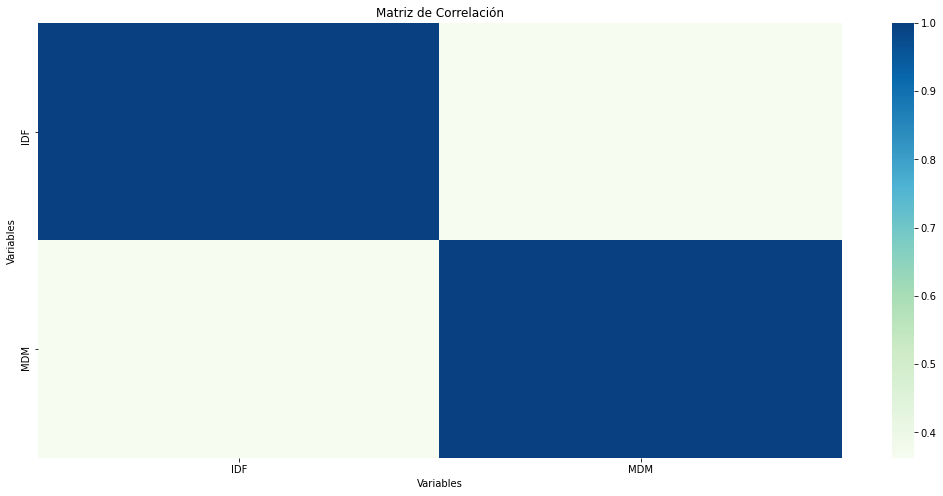

In [150]:
sns.heatmap(IDFMDMDATA.corr(), cmap="GnBu") 
plt.title('Matriz de Correlación');
plt.xlabel('Variables')
plt.ylabel('Variables')